In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import json

from fycharts.SpotifyCharts import SpotifyCharts
import sqlalchemy

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#### reading in data with song info and audio features via pickle

In [3]:
italy_17_19 = pd.read_pickle('../data/it_17_19_v50_feat.pkl')
italy_17_19.head()

Position          Track Name           Artist region  \
date                                                               
2017-01-01       1.0    Careless Whisper   George Michael     it   
2017-01-01       2.0         Tranquilla!  Fabrizio Vidale     it   
2017-01-01       3.0    Jesus to a Child   George Michael     it   
2017-01-01       4.0  Faith - Remastered   George Michael     it   
2017-01-01       5.0        Freedom! '90   George Michael     it   

                        spotify_id  danceability  energy  key  loudness  mode  \
date                                                                            
2017-01-01  4jDmJ51x1o9NZB5Nxxc7gY         0.574   0.629    2    -8.815     0   
2017-01-01  7D64ejn2d3g6QaahkYdKXH         0.822   0.736    5    -5.775     1   
2017-01-01  2SzCxX6M6vDwdEwnHDiTaY         0.534   0.415    1   -11.781     0   
2017-01-01  0HEmnAUT8PHznIAAmVXqFJ         0.887   0.480   11   -11.994     1   
2017-01-01  1D6nV9TPfMnWm7UdVsDVfI         0.673   0.813    5   -10.966     1   

            speechiness  acousticness  instrumentalness  liveness  valence  \
date                                                                         
2017-01-01       0.0363        0.1280          0.000000    0.2710    0.786   
2017-01-01       0.3130        0.2510          0.000000    0.0540    0.590   
2017-01-01       0.0278        0.3140          0.000365    0.0847    0.188   
2017-01-01       0.1170        0.0094          0.000036    0.0662    0.607   
2017-01-01       0.0445        0.1530          0.000029    0.0547    0.896   

              tempo  duration_ms  time_signature  
date                                              
2017-01-01  153.119       300107               4  
2017-01-01  135.132       163893               4  
2017-01-01  173.561       411147               4  
2017-01-01   95.846       193200               4  
2017-01-01   91.786       390867               4

In [4]:
type(italy_17_19.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [5]:
spain_17_19 = pd.read_pickle('../data/sp_17_19_v50_feat.pkl')
spain_17_19.head(2)

Position                   Track Name   Artist region  \
date                                                                
2017-01-01       1.0  Una Mierda como Un Castillo  Anntona     es   
2017-01-01       2.0               Last Christmas    Wham!     es   

                        spotify_id  danceability  energy  key  loudness  mode  \
date                                                                            
2017-01-01  5hRzeXfIh4WYHjH6flVG0n         0.414   0.802    0    -6.947     1   
2017-01-01  2FRnf9qhLbvw8fu4IBXx78         0.735   0.478    2   -12.472     1   

            speechiness  acousticness  instrumentalness  liveness  valence  \
date                                                                         
2017-01-01       0.0468       0.00266          0.000000    0.0774    0.792   
2017-01-01       0.0293       0.18900          0.000002    0.3550    0.947   

              tempo  duration_ms  time_signature  
date                                              
2017-01-01  165.043       130120               4  
2017-01-01  107.682       262960               4

In [6]:
greece_17_19 = pd.read_pickle('../data/gr_17_19_v50_feat.pkl')
greece_17_19.head(2)

Position                  Track Name          Artist region  \
date                                                                      
2017-01-01       1.0            Careless Whisper  George Michael     gr   
2017-01-01       2.0  Father Figure - Remastered  George Michael     gr   

                        spotify_id  danceability  energy  key  loudness  mode  \
date                                                                            
2017-01-01  4jDmJ51x1o9NZB5Nxxc7gY         0.574   0.629    2    -8.815     0   
2017-01-01  0L0T4tMAaGqLgIVj1MOj9t         0.689   0.333    3   -13.288     1   

            speechiness  acousticness  instrumentalness  liveness  valence  \
date                                                                         
2017-01-01       0.0363         0.128          0.000000    0.2710    0.786   
2017-01-01       0.0262         0.163          0.000034    0.0853    0.284   

              tempo  duration_ms  time_signature  
date                                              
2017-01-01  153.119       300107               4  
2017-01-01  101.988       336667               4

In [7]:
italy_20 = pd.read_pickle('../data/it_20_v50_feat.pkl')

In [8]:
spain_20 = pd.read_pickle('../data/sp_20_v50_feat.pkl')
greece_20 = pd.read_pickle('../data/gr_20_v50_feat.pkl')

#### Using resample to convert frequency of time series

**Resampling by month**

_`rm` denotes resampling by month._ 

In [9]:
rm_italy_17_19 = italy_17_19.resample("M").mean()

In [10]:
rm_spain_17_19 = spain_17_19.resample("M").mean()

In [11]:
rm_greece_17_19 = greece_17_19.resample("M").mean()

In [12]:
rm_italy_20 = italy_20.resample("M").mean()
rm_spain_20 = spain_20.resample("M").mean()
rm_greece_20 = greece_20.resample("M").mean()

In [13]:
rm_greece_17_19.head()

Position  danceability    energy       key  loudness      mode  \
date                                                                          
2017-01-31  25.500000      0.623512  0.578648  5.178710 -8.110230  0.494194   
2017-02-28  25.500000      0.631328  0.630000  5.601429 -7.075458  0.528571   
2017-03-31  25.500000      0.645652  0.613520  5.284516 -7.099301  0.500645   
2017-04-30  24.645094      0.600128  0.613156  5.418928 -7.840559  0.468337   
2017-05-31  25.500000      0.667397  0.654226  5.095484 -6.239945  0.534194   

            speechiness  acousticness  instrumentalness  liveness   valence  \
date                                                                          
2017-01-31     0.097904      0.339689          0.098880  0.163482  0.447883   
2017-02-28     0.105744      0.241931          0.063337  0.180805  0.447834   
2017-03-31     0.114139      0.223421          0.037094  0.178057  0.443244   
2017-04-30     0.104414      0.233973          0.115133  0.195247  0.453251   
2017-05-31     0.100792      0.184631          0.029448  0.161717  0.484632   

                 tempo    duration_ms  time_signature  
date                                                   
2017-01-31  120.775048  239326.568387        3.960645  
2017-02-28  117.654339  231601.845714        3.969286  
2017-03-31  118.944675  232328.482581        3.998710  
2017-04-30  120.179514  241941.037578        3.970077  
2017-05-31  118.419415  220697.492903        3.944516

**Resampling by week**

_`rw` denotes resampling by week._ 

In [14]:
rw_italy_17_19 = italy_17_19.resample("W").mean()
rw_spain_17_19 = spain_17_19.resample("W").mean()
rw_greece_17_19 = greece_17_19.resample("W").mean()

In [15]:
rw_italy_20 = italy_20.resample("W").mean()
rw_spain_20 = spain_20.resample("W").mean()
rw_greece_20 = greece_20.resample("W").mean()

### EDA

In [16]:
# artists danceability scores (mean across all their songs)
italy_17_19.groupby('Artist')[['danceability']].mean().sort_values(by='danceability', ascending=False)[:10]

danceability
Artist                                
Ambjaay                          0.978
Rokas                            0.969
ANNA                             0.968
Monolink                         0.967
Lil Baby                         0.963
Unknown Mortal Orchestra         0.956
Los Solteroski                   0.954
VillaBanks                       0.950
Leyenda Barrial Boy'z            0.949
DJ Scheme                        0.949

In [17]:
spain_17_19.groupby('Artist')[['danceability']].mean().sort_values(by='danceability', ascending=False)[:10]

danceability
Artist                                
Ambjaay                       0.978000
Lacrim                        0.968000
Lil Baby                      0.963000
Unknown Mortal Orchestra      0.956000
Leikeli47                     0.956000
Los Solteroski                0.955667
KARLK                         0.954000
Leyenda Barrial Boy'z         0.949000
Good Gas                      0.949000
Dr Stiig                      0.947000

In [18]:
greece_17_19.groupby('Artist')[['danceability']].mean().sort_values(by='danceability', ascending=False)[:10]

danceability
Artist                               
DJ Suede The Remix God       0.981000
Ambjaay                      0.978000
John K                       0.958000
El Sawareekh                 0.944000
Baka Not Nice                0.943000
Melii                        0.942000
MadeinTYO                    0.937400
Lil Pump                     0.927044
YBN (Young Boss N*ggas)      0.926000
Saweetie                     0.924619

In [19]:
# for each artist, times in the viral 50 from 2017-10
italy_17_19.groupby('Artist').count().sort_values(by='Position', ascending=False)[:4]

Position  Track Name  region  spotify_id  danceability  \
Artist                                                                   
Coez                 502         502     502         502           502   
Takagi & Ketra       316         316     316         316           316   
Sfera Ebbasta        306         306     306         306           306   
Thegiornalisti       302         302     302         302           302   

                energy  key  loudness  mode  speechiness  acousticness  \
Artist                                                                   
Coez               502  502       502   502          502           502   
Takagi & Ketra     316  316       316   316          316           316   
Sfera Ebbasta      306  306       306   306          306           306   
Thegiornalisti     302  302       302   302          302           302   

                instrumentalness  liveness  valence  tempo  duration_ms  \
Artist                                                                    
Coez                         502       502      502    502          502   
Takagi & Ketra               316       316      316    316          316   
Sfera Ebbasta                306       306      306    306          306   
Thegiornalisti               302       302      302    302          302   

                time_signature  
Artist                          
Coez                       502  
Takagi & Ketra             316  
Sfera Ebbasta              306  
Thegiornalisti             302

In [20]:
spain_17_19.groupby('Artist').count().sort_values(by='Position', ascending=False)[:4]

Position  Track Name  region  spotify_id  danceability  energy  key  \
Artist                                                                          
Ozuna          448         448     448         448           448     448  448   
Becky G        436         436     436         436           436     436  436   
Anuel AA       412         412     412         412           412     412  412   
ROSALÍA        406         406     406         406           406     406  406   

          loudness  mode  speechiness  acousticness  instrumentalness  \
Artist                                                                  
Ozuna          448   448          448           448               448   
Becky G        436   436          436           436               436   
Anuel AA       412   412          412           412               412   
ROSALÍA        406   406          406           406               406   

          liveness  valence  tempo  duration_ms  time_signature  
Artist                                                           
Ozuna          448      448    448          448             448  
Becky G        436      436    436          436             436  
Anuel AA       412      412    412          412             412  
ROSALÍA        406      406    406          406             406

In [21]:
greece_17_19.groupby('Artist').count().sort_values(by='Position', ascending=False)[:4]

Position  Track Name  region  spotify_id  danceability  energy  \
Artist                                                                        
Sin Boy           861         861     861         861           861     861   
Drake             733         733     733         733           733     733   
TOQUEL            612         612     612         612           612     612   
Post Malone       595         595     595         595           595     595   

             key  loudness  mode  speechiness  acousticness  instrumentalness  \
Artist                                                                          
Sin Boy      861       861   861          861           861               861   
Drake        733       733   733          733           733               733   
TOQUEL       612       612   612          612           612               612   
Post Malone  595       595   595          595           595               595   

             liveness  valence  tempo  duration_ms  time_signature  
Artist                                                              
Sin Boy           861      861    861          861             861  
Drake             733      733    733          733             733  
TOQUEL            612      612    612          612             612  
Post Malone       595      595    595          595             595

### Time Series Plotting 

Text(0.5, 1.0, 'Average Monthly Danceability Score for Songs on the Daily Viral 50 Chart in Italy')

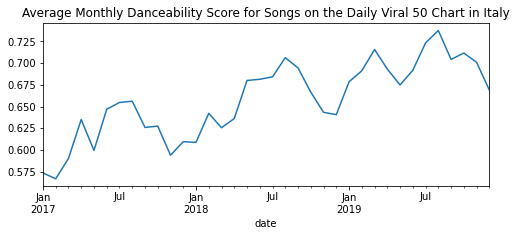

In [22]:
rm_italy_17_19['danceability'].plot(figsize=(8,3))
plt.title("Average Monthly Danceability Score for Songs on the Daily Viral 50 Chart in Italy")

In [23]:
rm_italy_17_19.columns

Index(['Position', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [24]:
audio_features = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']

#### Audio Features in Italy, Spain, Greece 2017 - 2019  - Basic Line Plots 

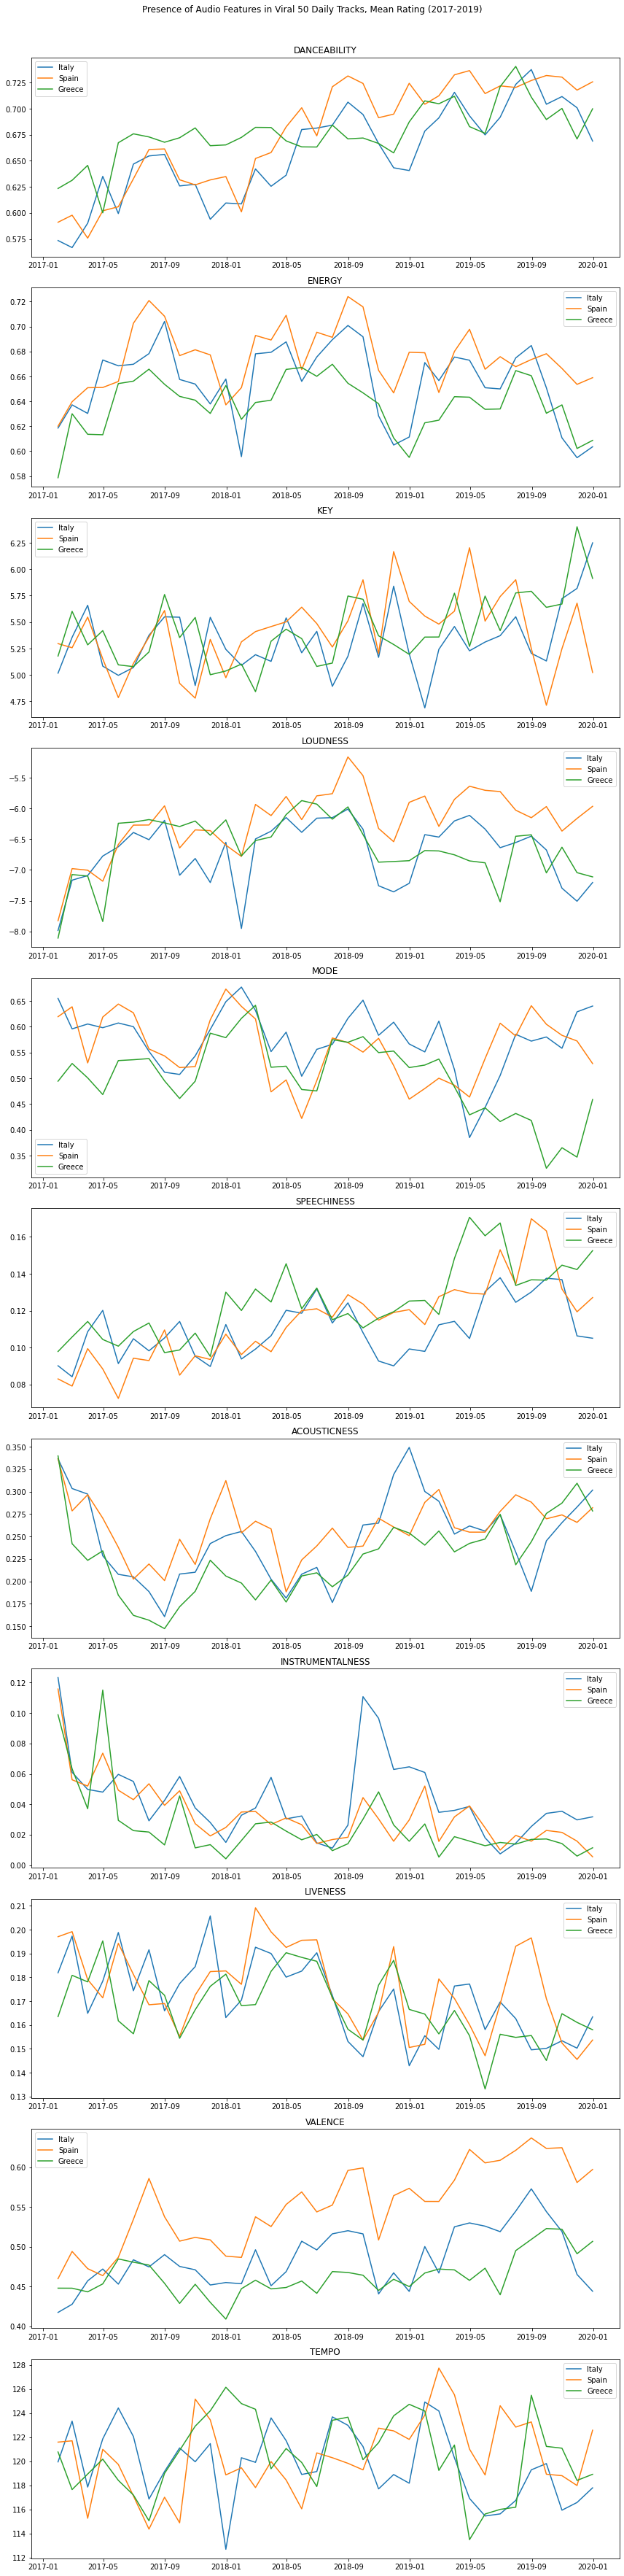

In [25]:
fig, axs = plt.subplots(nrows=11, ncols=1, figsize=(12,50))
fig.subplots_adjust(hspace=.5,wspace=0.4)

for i, feature in enumerate(audio_features): 

    axs[i].plot(rm_italy_17_19[feature], label='Italy')
    axs[i].plot(rm_spain_17_19[feature], label='Spain')
    axs[i].plot(rm_greece_17_19[feature], label='Greece')
    axs[i].set_title(f'{feature.upper()}')
    axs[i].legend()
    
fig.tight_layout()
fig.subplots_adjust(top=.96)
fig.suptitle('Presence of Audio Features in Viral 50 Daily Tracks, Mean Rating (2017-2019)')
plt.show()

#### Audio Features in Italy, Spain, Greece 2020 - Basic Line Plots 

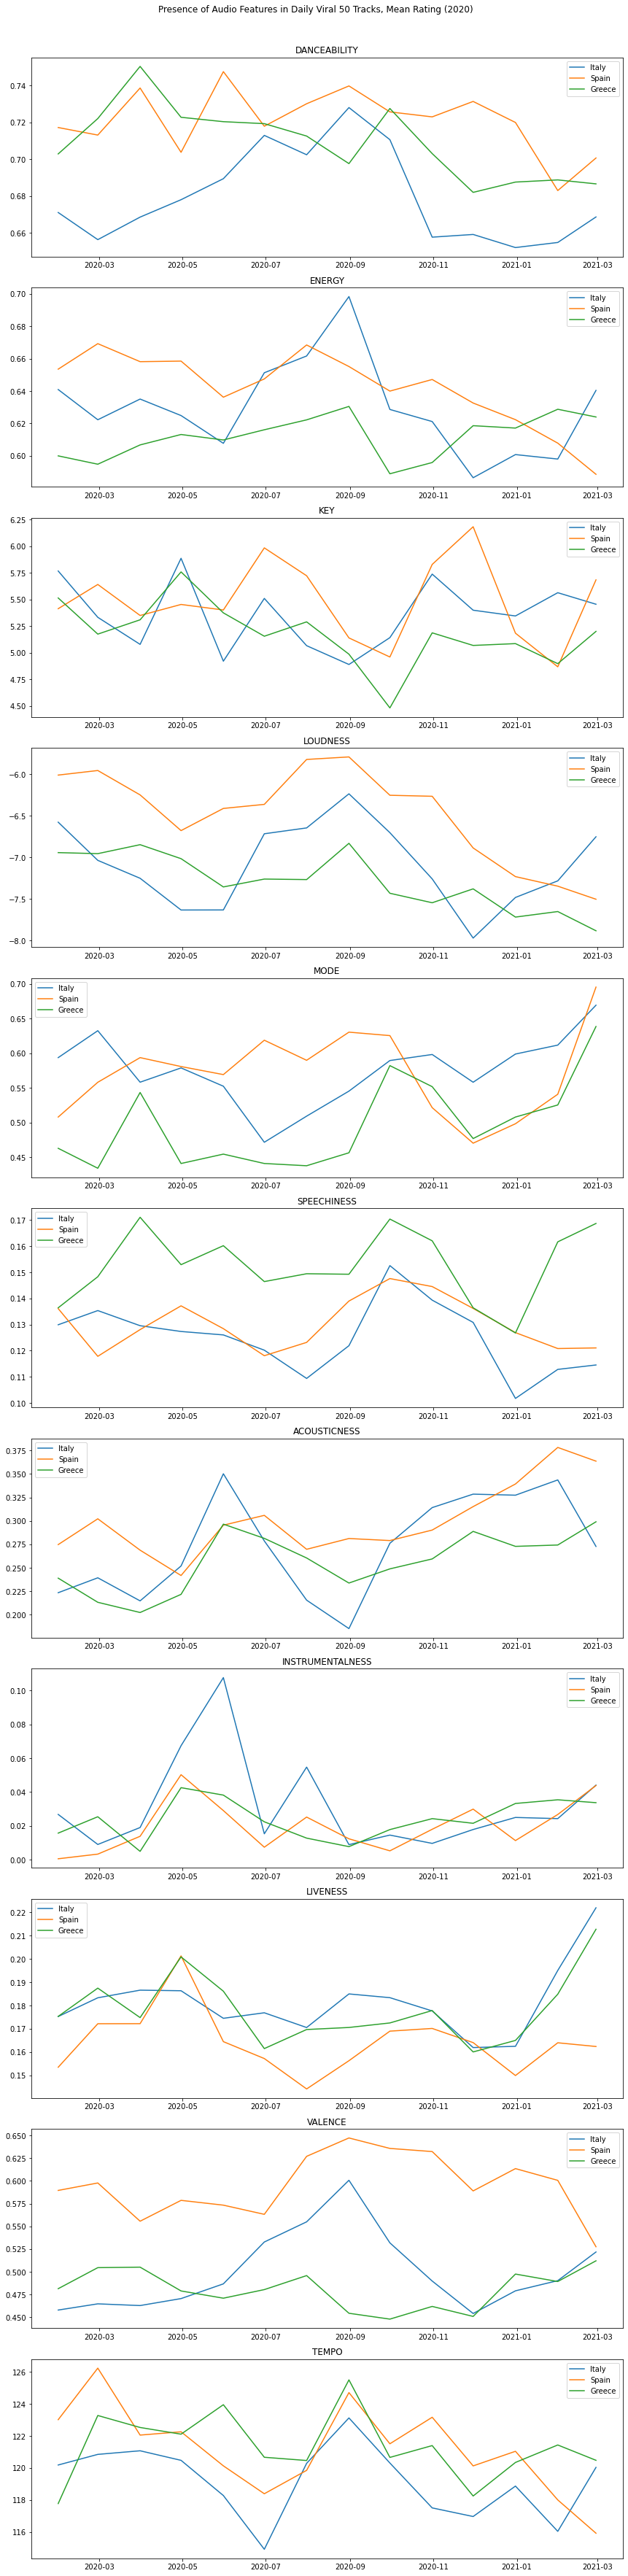

In [26]:
fig, axs = plt.subplots(nrows=11, ncols=1, figsize=(12,50))
fig.subplots_adjust(hspace=.5,wspace=0.4)

for i, feature in enumerate(audio_features): 

    axs[i].plot(rm_italy_20[feature], label='Italy')
    axs[i].plot(rm_spain_20[feature], label='Spain')
    axs[i].plot(rm_greece_20[feature], label='Greece')
    axs[i].set_title(f'{feature.upper()}')
    axs[i].legend()
    
fig.tight_layout()
fig.subplots_adjust(top=.96)
fig.suptitle('Presence of Audio Features in Daily Viral 50 Tracks, Mean Rating (2020)')
plt.show()

#### Autocorrelation and Partial Autocorrelation Plots, 2017-19

_Using weekly resample for autocorrelation plots:_

In [27]:
# fig, axs = plt.subplots(nrows=11, ncols=3, figsize=(12,50))
# fig.subplots_adjust(hspace=.5,wspace=0.4)

# for i, feature in enumerate(audio_features): 

#     axs[i].plot_acf(rw_italy_17_19[feature].dropna(), lags=52, title=feature.capitalize())
#     axs[i].plot_acf(rw_spain_17_19[feature].dropna(), lags=52, title=feature.capitalize())
#     axs[i].plot_acf(rw_greece_17_19[feature].dropna(), lags=52, title=feature.capitalize())

# #     axs[i].set_title(f'{feature.upper()}')
# #     axs[i].legend()
    
# # fig.tight_layout()
# # fig.subplots_adjust(top=.96)
# # fig.suptitle('Presence of Audio Features in Top 200 Weekly Tracks, Mean Rating (2020)')
# plt.show()

In [28]:
# for feature in audio_features:
    
#     plot_acf(rw_italy_17_19[feature].dropna(), lags=52, title=feature.capitalize())

In [29]:
# for feature in audio_features:
    
#     plot_pacf(rw_italy_17_19[feature].dropna(), lags=52, title=feature.capitalize())

In [30]:
# for feature in audio_features:
    
#     plot_acf(rw_italy_17_19[feature].dropna(), lags=52, title=feature.capitalize())

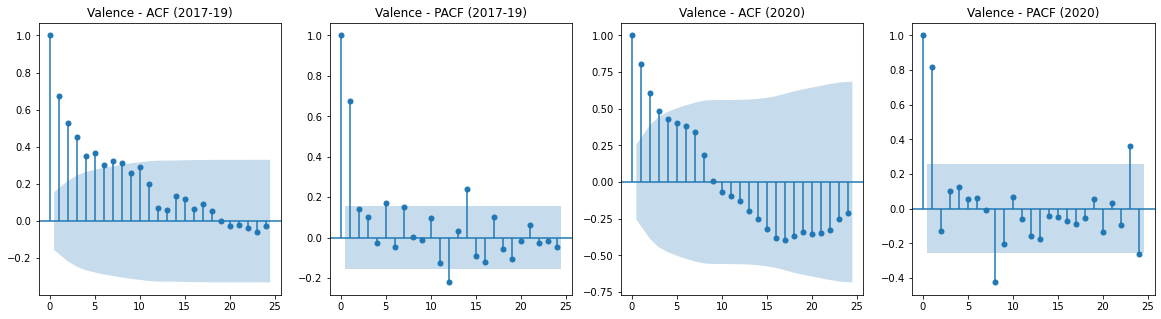

In [31]:
fig,ax = plt.subplots(1, 4, figsize=(20,5))
plot_acf(rw_italy_17_19['valence'].dropna(), lags=24, title='Valence - ACF (2017-19)', ax=ax[0])
plot_pacf(rw_italy_17_19['valence'].dropna(), lags=24, title='Valence - PACF (2017-19)', ax=ax[1])
plot_acf(rw_italy_20['valence'].dropna(), lags=24, title='Valence - ACF (2020)', ax=ax[2])
plot_pacf(rw_italy_20['valence'].dropna(), lags=24, title='Valence - PACF (2020)', ax=ax[3]) ;


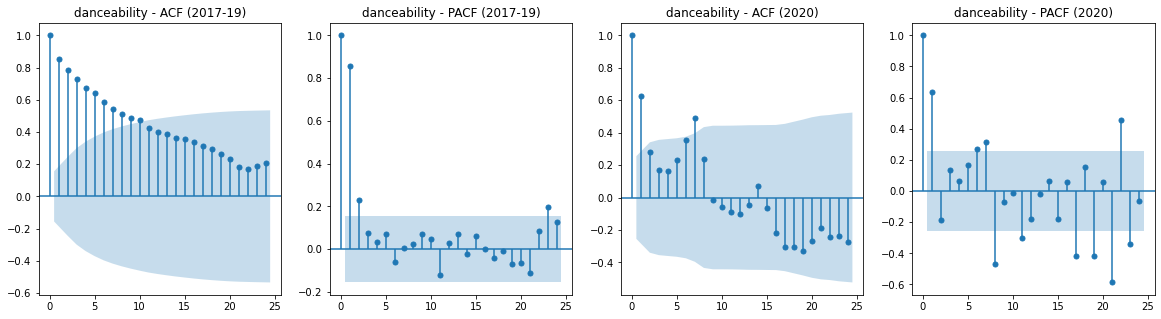

In [32]:
fig,ax = plt.subplots(1, 4, figsize=(20,5))
plot_acf(rw_italy_17_19['danceability'].dropna(), lags=24, title='danceability - ACF (2017-19)', ax=ax[0])
plot_pacf(rw_italy_17_19['danceability'].dropna(), lags=24, title='danceability - PACF (2017-19)', ax=ax[1])
plot_acf(rw_italy_20['danceability'].dropna(), lags=24, title='danceability - ACF (2020)', ax=ax[2])
plot_pacf(rw_italy_20['danceability'].dropna(), lags=24, title='danceability - PACF (2020)', ax=ax[3]) ;

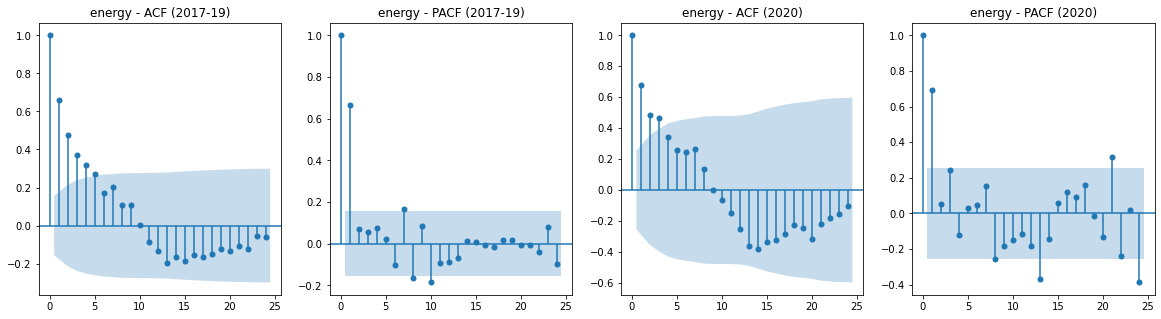

In [33]:
fig,ax = plt.subplots(1, 4, figsize=(20,5))
plot_acf(rw_italy_17_19['energy'].dropna(), lags=24, title='energy - ACF (2017-19)', ax=ax[0])
plot_pacf(rw_italy_17_19['energy'].dropna(), lags=24, title='energy - PACF (2017-19)', ax=ax[1])
plot_acf(rw_italy_20['energy'].dropna(), lags=24, title='energy - ACF (2020)', ax=ax[2])
plot_pacf(rw_italy_20['energy'].dropna(), lags=24, title='energy - PACF (2020)', ax=ax[3]) ;

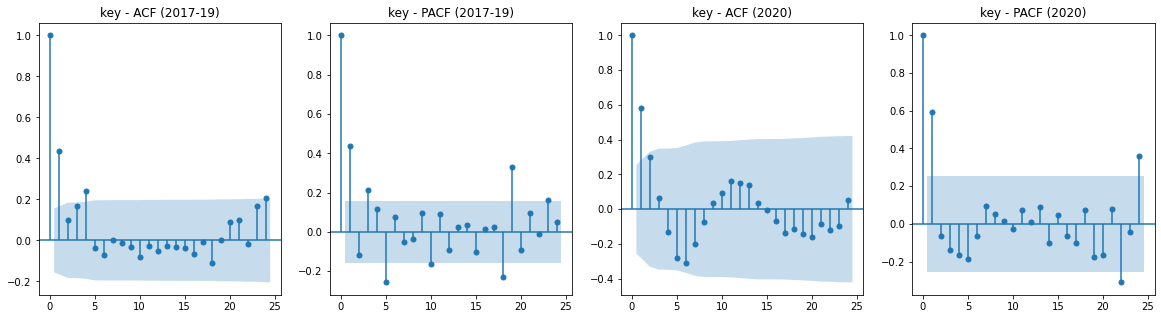

In [34]:
fig,ax = plt.subplots(1, 4, figsize=(20,5))
plot_acf(rw_italy_17_19['key'].dropna(), lags=24, title='key - ACF (2017-19)', ax=ax[0])
plot_pacf(rw_italy_17_19['key'].dropna(), lags=24, title='key - PACF (2017-19)', ax=ax[1])
plot_acf(rw_italy_20['key'].dropna(), lags=24, title='key - ACF (2020)', ax=ax[2])
plot_pacf(rw_italy_20['key'].dropna(), lags=24, title='key - PACF (2020)', ax=ax[3]) ;

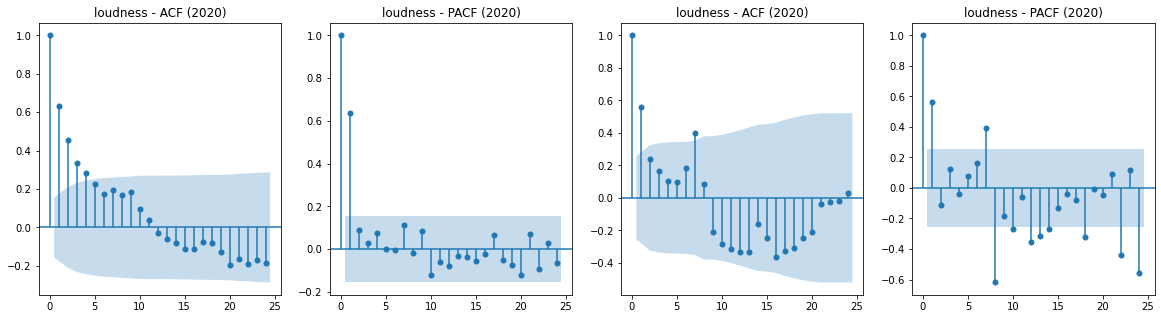

In [35]:
fig,ax = plt.subplots(1, 4, figsize=(20,5))
plot_acf(rw_italy_17_19['loudness'].dropna(), lags=24, title='loudness - ACF (2020)', ax=ax[0])
plot_pacf(rw_italy_17_19['loudness'].dropna(), lags=24, title='loudness - PACF (2020)', ax=ax[1])
plot_acf(rw_italy_20['loudness'].dropna(), lags=24, title='loudness - ACF (2020)', ax=ax[2])
plot_pacf(rw_italy_20['loudness'].dropna(), lags=24, title='loudness - PACF (2020)', ax=ax[3]) ;

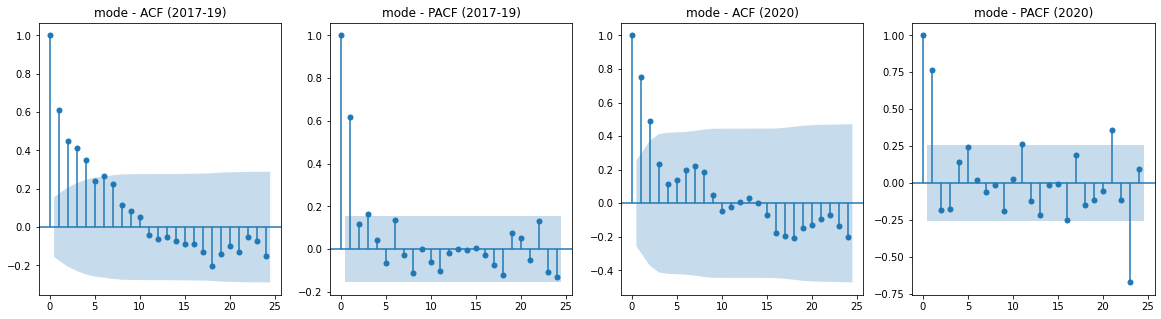

In [36]:
fig,ax = plt.subplots(1, 4, figsize=(20,5))
plot_acf(rw_italy_17_19['mode'].dropna(), lags=24, title='mode - ACF (2017-19)', ax=ax[0])
plot_pacf(rw_italy_17_19['mode'].dropna(), lags=24, title='mode - PACF (2017-19)', ax=ax[1])
plot_acf(rw_italy_20['mode'].dropna(), lags=24, title='mode - ACF (2020)', ax=ax[2])
plot_pacf(rw_italy_20['mode'].dropna(), lags=24, title='mode - PACF (2020)', ax=ax[3]) ;

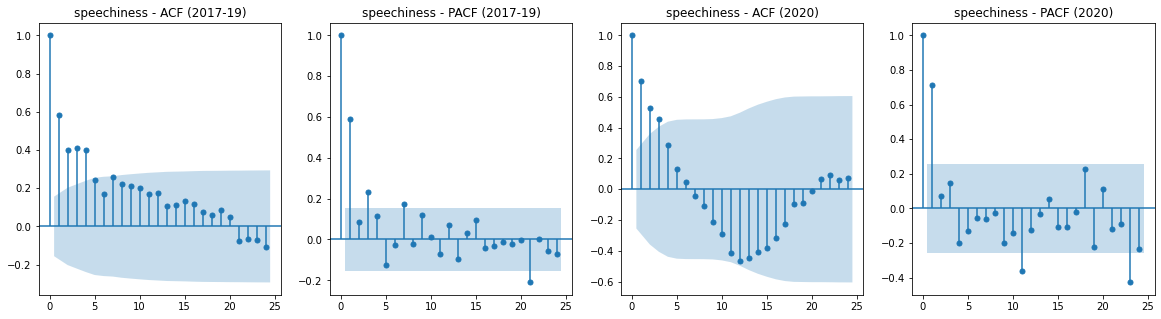

In [37]:
fig,ax = plt.subplots(1, 4, figsize=(20,5))
plot_acf(rw_italy_17_19['speechiness'].dropna(), lags=24, title='speechiness - ACF (2017-19)', ax=ax[0])
plot_pacf(rw_italy_17_19['speechiness'].dropna(), lags=24, title='speechiness - PACF (2017-19)', ax=ax[1])
plot_acf(rw_italy_20['speechiness'].dropna(), lags=24, title='speechiness - ACF (2020)', ax=ax[2])
plot_pacf(rw_italy_20['speechiness'].dropna(), lags=24, title='speechiness - PACF (2020)', ax=ax[3]) ;

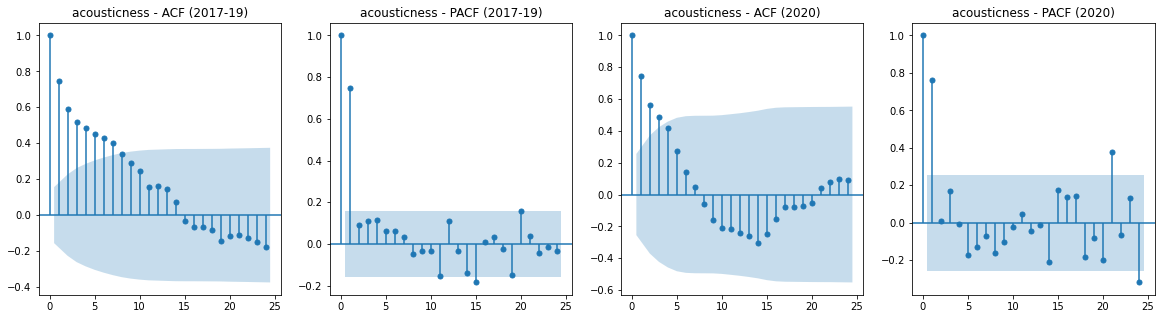

In [38]:
fig,ax = plt.subplots(1, 4, figsize=(20,5))
plot_acf(rw_italy_17_19['acousticness'].dropna(), lags=24, title='acousticness - ACF (2017-19)', ax=ax[0])
plot_pacf(rw_italy_17_19['acousticness'].dropna(), lags=24, title='acousticness - PACF (2017-19)', ax=ax[1])
plot_acf(rw_italy_20['acousticness'].dropna(), lags=24, title='acousticness - ACF (2020)', ax=ax[2])
plot_pacf(rw_italy_20['acousticness'].dropna(), lags=24, title='acousticness - PACF (2020)', ax=ax[3]) ;

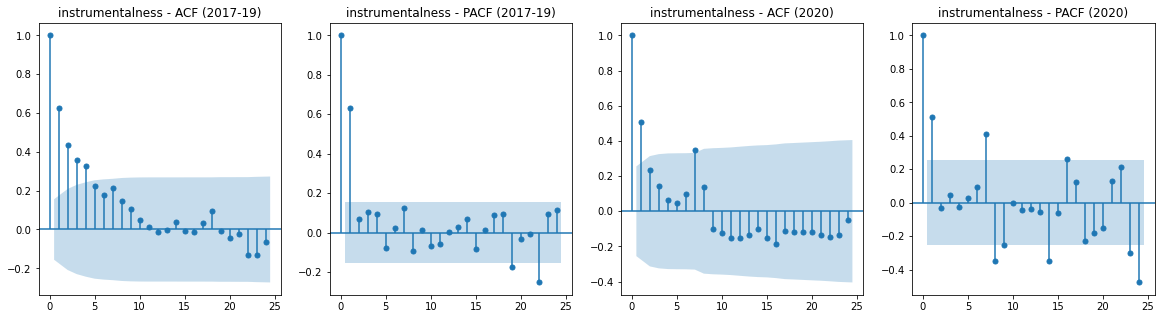

In [39]:
fig,ax = plt.subplots(1, 4, figsize=(20,5))
plot_acf(rw_italy_17_19['instrumentalness'].dropna(), lags=24, title='instrumentalness - ACF (2017-19)', ax=ax[0])
plot_pacf(rw_italy_17_19['instrumentalness'].dropna(), lags=24, title='instrumentalness - PACF (2017-19)', ax=ax[1])
plot_acf(rw_italy_20['instrumentalness'].dropna(), lags=24, title='instrumentalness - ACF (2020)', ax=ax[2])
plot_pacf(rw_italy_20['instrumentalness'].dropna(), lags=24, title='instrumentalness - PACF (2020)', ax=ax[3]) ;

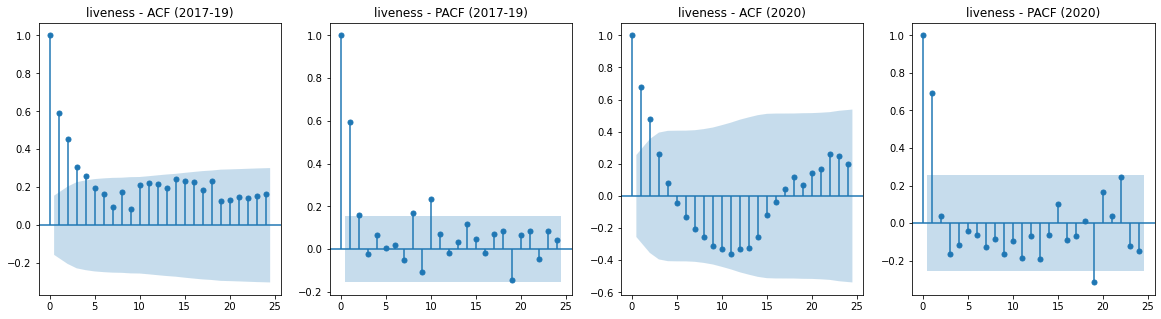

In [40]:
fig,ax = plt.subplots(1, 4, figsize=(20,5))
plot_acf(rw_italy_17_19['liveness'].dropna(), lags=24, title='liveness - ACF (2017-19)', ax=ax[0])
plot_pacf(rw_italy_17_19['liveness'].dropna(), lags=24, title='liveness - PACF (2017-19)', ax=ax[1])
plot_acf(rw_italy_20['liveness'].dropna(), lags=24, title='liveness - ACF (2020)', ax=ax[2])
plot_pacf(rw_italy_20['liveness'].dropna(), lags=24, title='liveness - PACF (2020)', ax=ax[3]) ;

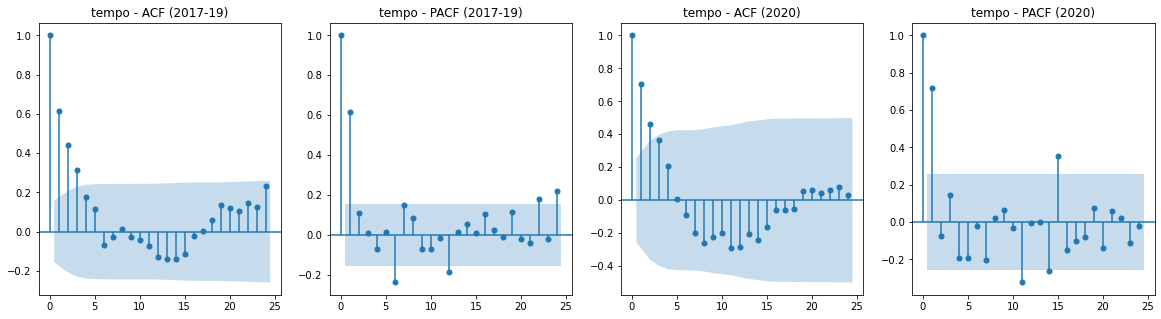

In [41]:
fig,ax = plt.subplots(1, 4, figsize=(20,5))
plot_acf(rw_italy_17_19['tempo'].dropna(), lags=24, title='tempo - ACF (2017-19)', ax=ax[0])
plot_pacf(rw_italy_17_19['tempo'].dropna(), lags=24, title='tempo - PACF (2017-19)', ax=ax[1])
plot_acf(rw_italy_20['tempo'].dropna(), lags=24, title='tempo - ACF (2020)', ax=ax[2])
plot_pacf(rw_italy_20['tempo'].dropna(), lags=24, title='tempo - PACF (2020)', ax=ax[3]) ;

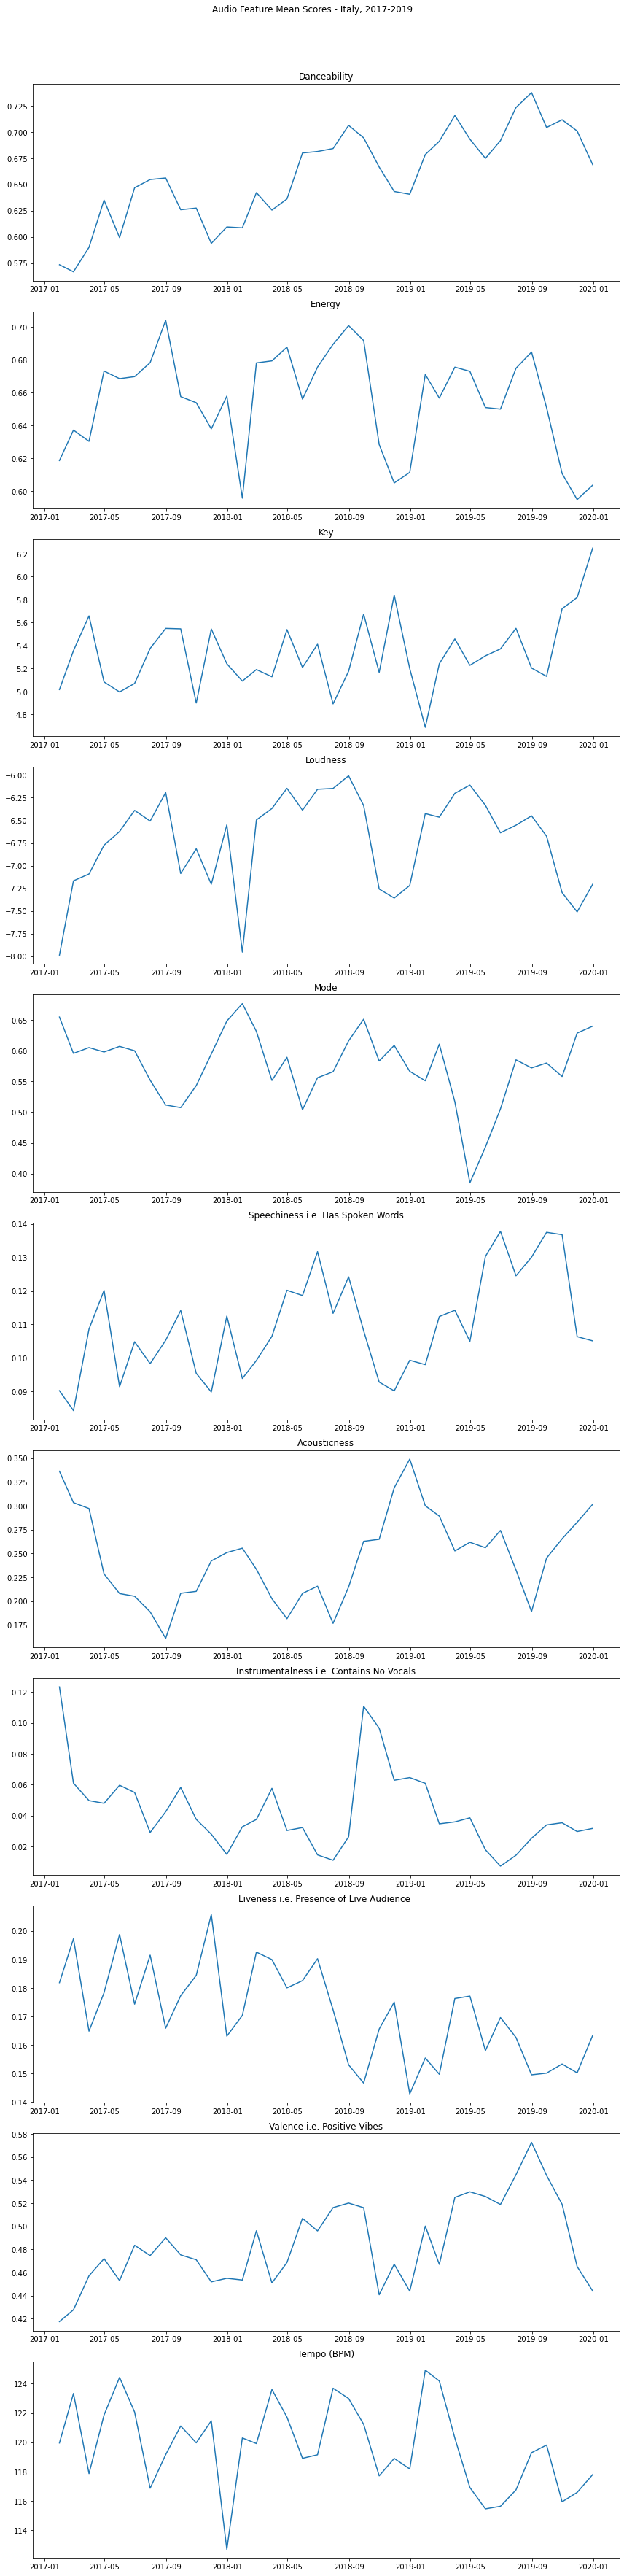

In [42]:
fig, axs= plt.subplots(11,1, figsize=(12, 50))

axs[0].plot(rm_italy_17_19['danceability'])
axs[0].set_title('Danceability')
axs[1].plot(rm_italy_17_19['energy'])
axs[1].set_title('Energy')
axs[2].plot(rm_italy_17_19['key'])
axs[2].set_title('Key')
axs[3].plot(rm_italy_17_19['loudness']) 
axs[3].set_title('Loudness')
axs[4].plot(rm_italy_17_19['mode'])
axs[4].set_title('Mode')
axs[5].plot(rm_italy_17_19['speechiness'])
axs[5].set_title('Speechiness i.e. Has Spoken Words')
axs[6].plot(rm_italy_17_19['acousticness'])
axs[6].set_title('Acousticness')
axs[7].plot(rm_italy_17_19['instrumentalness'])
axs[7].set_title('Instrumentalness i.e. Contains No Vocals')
axs[8].plot(rm_italy_17_19['liveness'])
axs[8].set_title('Liveness i.e. Presence of Live Audience ')
axs[9].plot(rm_italy_17_19['valence'])
axs[9].set_title('Valence i.e. Positive Vibes')
axs[10].plot(rm_italy_17_19['tempo'])
axs[10].set_title('Tempo (BPM)')


fig.tight_layout()
fig.subplots_adjust(top=.95)
fig.suptitle('Audio Feature Mean Scores - Italy, 2017-2019')
plt.show()

From [linear-ts-modeling-lesson-notebook](10-week/10.02-linear-timeseries-modeling/linear-ts-modeling-starter-code.ipynb):

In [43]:
# Write function called plot_series that takes in 
# a dataframe, a list of column names to plot, the 
# plot title and the axis labels as arguments,
# then displays the line plot with a figure size
# of 18 horizontal inches by 9 vertical inches.

# Matthew Garton - BOS



def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, figsize=(18,9)):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=figsize)
    
    # Iterate through each column name.
    for col in cols:
        
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18);

In [44]:
audio_features

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

In [45]:
# plot_series(rm_italy_17_19, ['danceability'], title='Dancebility', figsize=(15,4))

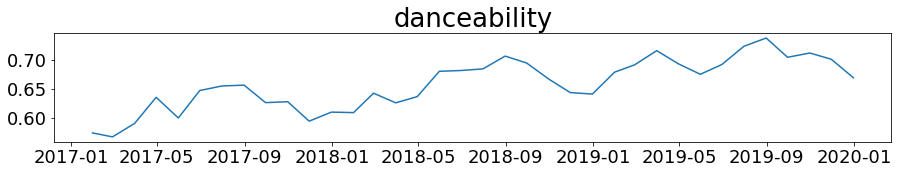

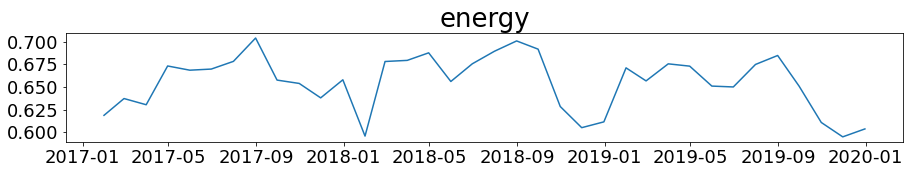

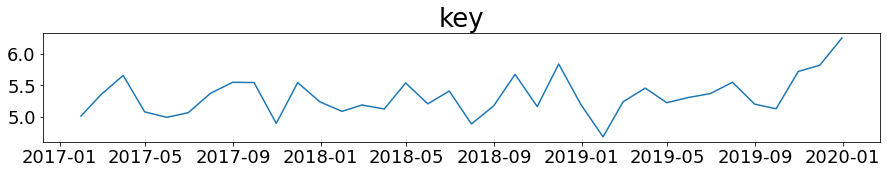

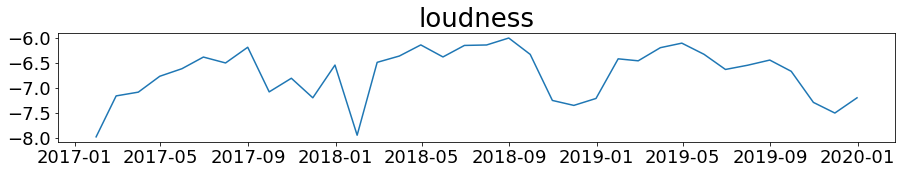

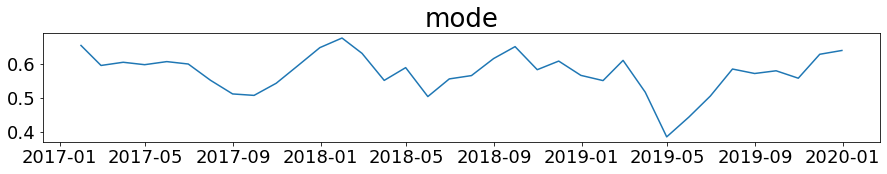

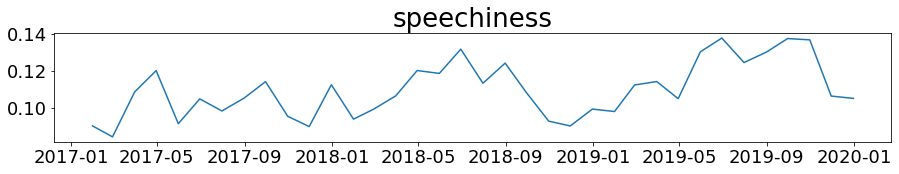

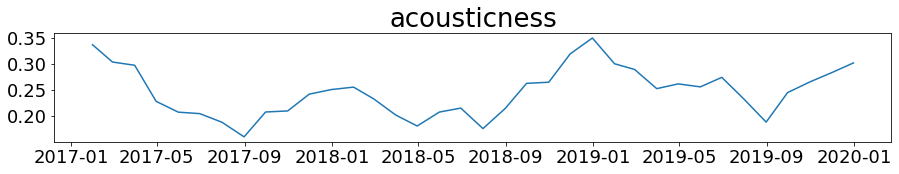

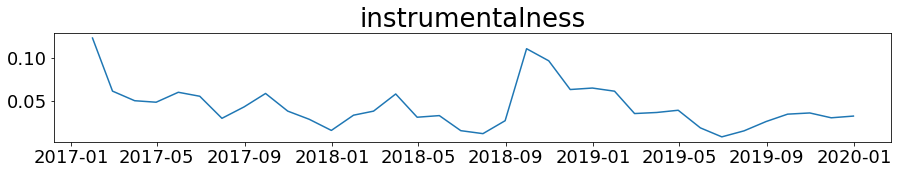

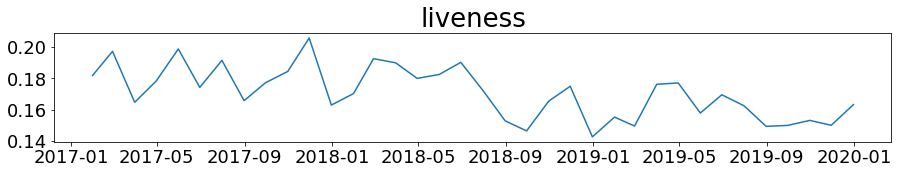

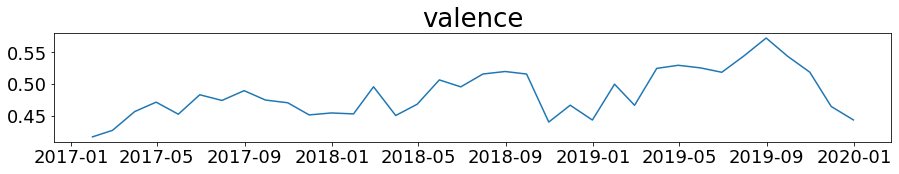

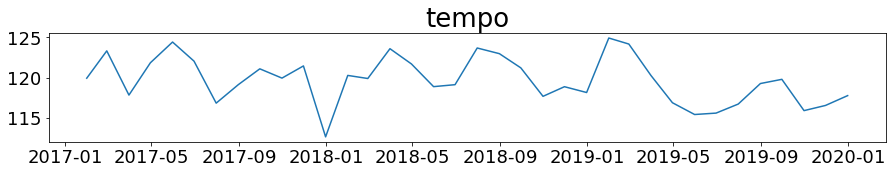

In [46]:
for col in audio_features:
    plot_series(rm_italy_17_19, [col], title=col, figsize=(15,2))

In [47]:
# rm_italy_17_19['danceability'].plot(figsize=(20,10))
# plt.title("Average Monthly Danceability Score for Songs on the Top 200 Weekliy Chart in Italy")

In [48]:
# fig, axs= plt.subplots(11,1, figsize=(15, 50))

# # for i, features in enumerate(audio_features):
# #     axs[i].plot(rm_italy_17_19[feature])

# # fig, axs= plt.subplots(11,1, figsize=(10,20))

# axs[0].plot(italy_17_19['danceability'])
# axs[0].set_title('Danceability')
# axs[1].plot(italy_17_19['energy'])
# axs[1].set_title('Energy')
# axs[2].plot(italy_17_19['key'])
# axs[2].set_title('Key')
# axs[3].plot(italy_17_19['loudness']) 
# axs[3].set_title('Loudness')
# axs[4].plot(italy_17_19['mode'])
# axs[4].set_title('Mode')
# axs[5].plot(italy_17_19['speechiness'])
# axs[5].set_title('Speechiness i.e. Has Spoken Words')
# axs[6].plot(italy_17_19['acousticness'])
# axs[6].set_title('Acousticness')
# axs[7].plot(italy_17_19['instrumentalness'])
# axs[7].set_title('Instrumentalness i.e. Contains No Vocals')
# axs[8].plot(italy_17_19['liveness'])
# axs[8].set_title('Liveness i.e. Presence of Live Audience ')
# axs[9].plot(italy_17_19['valence'])
# axs[9].set_title('Valence i.e. Positive Vibes')
# axs[10].plot(italy_17_19['tempo'])
# axs[10].set_title('Tempo (BPM)')


# fig.tight_layout()
# fig.subplots_adjust(top=.95)
# fig.suptitle('Audio Feature Mean Scores - Italy, 2017-2019')
# plt.show()

In [49]:
rw_italy_17_19 = italy_17_19.resample("W").mean()
rw_italy_17_19.head()

Position  danceability    energy       key  loudness      mode  \
date                                                                         
2017-01-01      25.5      0.604800  0.591096  5.840000 -9.008200  0.600000   
2017-01-08      25.5      0.592829  0.596115  5.602857 -8.670323  0.717143   
2017-01-15      25.5      0.590561  0.584263  5.025714 -8.433451  0.625714   
2017-01-22      25.5      0.570760  0.618591  4.497143 -7.809969  0.588571   
2017-01-29      25.5      0.549560  0.672368  4.888571 -6.910569  0.705714   

            speechiness  acousticness  instrumentalness  liveness   valence  \
date                                                                          
2017-01-01     0.081670      0.303003          0.061578  0.172262  0.466054   
2017-01-08     0.091595      0.355359          0.182476  0.175617  0.390494   
2017-01-15     0.091436      0.340648          0.141121  0.204428  0.402156   
2017-01-22     0.093505      0.348782          0.111421  0.163771  0.396994   
2017-01-29     0.087994      0.302466          0.069887  0.175481  0.469083   

                 tempo    duration_ms  time_signature  
date                                                   
2017-01-01  115.511720  257468.600000        3.860000  
2017-01-08  118.564109  279987.502857        3.908571  
2017-01-15  118.157554  252121.394286        3.985714  
2017-01-22  119.730454  240012.791429        3.934286  
2017-01-29  122.640960  230365.305714        3.954286

In [50]:
# italy_17_19.head()

In [51]:
lag_df = rw_italy_17_19[audio_features].copy()
lag_df.head()

danceability    energy       key  loudness      mode  speechiness  \
date                                                                            
2017-01-01      0.604800  0.591096  5.840000 -9.008200  0.600000     0.081670   
2017-01-08      0.592829  0.596115  5.602857 -8.670323  0.717143     0.091595   
2017-01-15      0.590561  0.584263  5.025714 -8.433451  0.625714     0.091436   
2017-01-22      0.570760  0.618591  4.497143 -7.809969  0.588571     0.093505   
2017-01-29      0.549560  0.672368  4.888571 -6.910569  0.705714     0.087994   

            acousticness  instrumentalness  liveness   valence       tempo  
date                                                                        
2017-01-01      0.303003          0.061578  0.172262  0.466054  115.511720  
2017-01-08      0.355359          0.182476  0.175617  0.390494  118.564109  
2017-01-15      0.340648          0.141121  0.204428  0.402156  118.157554  
2017-01-22      0.348782          0.111421  0.163771  0.396994  119.730454  
2017-01-29      0.302466          0.069887  0.175481  0.469083  122.640960

In [52]:
lag_df['one_week_lag_dance'] = lag_df['danceability'].diff(1).fillna(0)

In [53]:
lag_df.head()

danceability    energy       key  loudness      mode  speechiness  \
date                                                                            
2017-01-01      0.604800  0.591096  5.840000 -9.008200  0.600000     0.081670   
2017-01-08      0.592829  0.596115  5.602857 -8.670323  0.717143     0.091595   
2017-01-15      0.590561  0.584263  5.025714 -8.433451  0.625714     0.091436   
2017-01-22      0.570760  0.618591  4.497143 -7.809969  0.588571     0.093505   
2017-01-29      0.549560  0.672368  4.888571 -6.910569  0.705714     0.087994   

            acousticness  instrumentalness  liveness   valence       tempo  \
date                                                                         
2017-01-01      0.303003          0.061578  0.172262  0.466054  115.511720   
2017-01-08      0.355359          0.182476  0.175617  0.390494  118.564109   
2017-01-15      0.340648          0.141121  0.204428  0.402156  118.157554   
2017-01-22      0.348782          0.111421  0.163771  0.396994  119.730454   
2017-01-29      0.302466          0.069887  0.175481  0.469083  122.640960   

            one_week_lag_dance  
date                            
2017-01-01            0.000000  
2017-01-08           -0.011971  
2017-01-15           -0.002267  
2017-01-22           -0.019801  
2017-01-29           -0.021200

In [54]:
lag_df_dance = rw_italy_17_19[['danceability']].copy()
lag_df_dance.head()

danceability
date                    
2017-01-01      0.604800
2017-01-08      0.592829
2017-01-15      0.590561
2017-01-22      0.570760
2017-01-29      0.549560

In [55]:
lag_df_dance['one_week_lag'] = lag_df_dance['danceability'].diff(1).fillna(0)
lag_df_dance['two_week_lag'] = lag_df_dance['danceability'].diff(2).fillna(0)
lag_df_dance['one_month_lag'] = lag_df_dance['danceability'].diff(4).fillna(0)
lag_df_dance['quarterly_lag'] = lag_df_dance['danceability'].diff(13).fillna(0)
lag_df_dance['one_year_lag'] = lag_df_dance['danceability'].diff(52).fillna(0)

In [56]:
lag_df_dance.corr()

danceability  one_week_lag  two_week_lag  one_month_lag  \
danceability       1.000000      0.262692      0.305489       0.352328   
one_week_lag       0.262692      1.000000      0.598880       0.453102   
two_week_lag       0.305489      0.598880      1.000000       0.605468   
one_month_lag      0.352328      0.453102      0.605468       1.000000   
quarterly_lag      0.384503      0.259019      0.333405       0.467272   
one_year_lag       0.537026      0.196336      0.235987       0.330697   

               quarterly_lag  one_year_lag  
danceability        0.384503      0.537026  
one_week_lag        0.259019      0.196336  
two_week_lag        0.333405      0.235987  
one_month_lag       0.467272      0.330697  
quarterly_lag       1.000000      0.231376  
one_year_lag        0.231376      1.000000

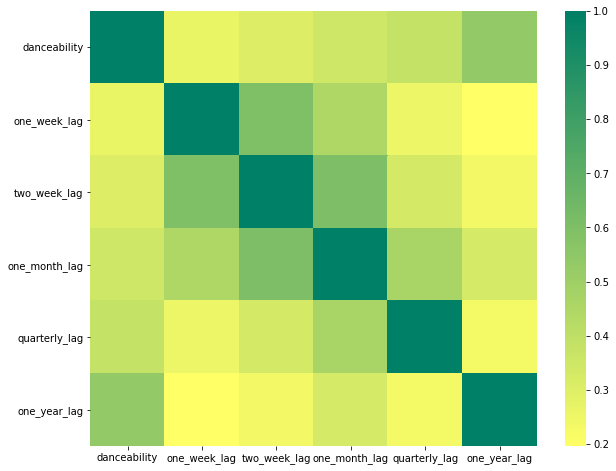

In [57]:
fig, ax = plt.subplots(figsize=(10,8))  
sns.heatmap(lag_df_dance.corr(), cmap='summer_r') ;

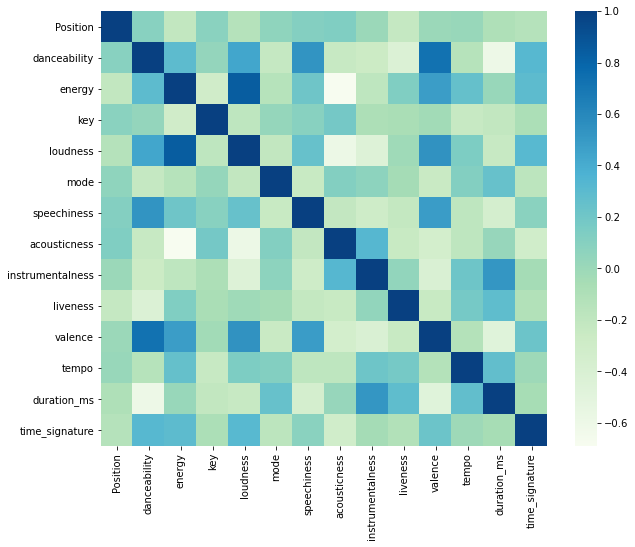

In [58]:
fig, ax = plt.subplots(figsize=(10,8))  
sns.heatmap(rw_italy_17_19.corr(), cmap='GnBu') ;

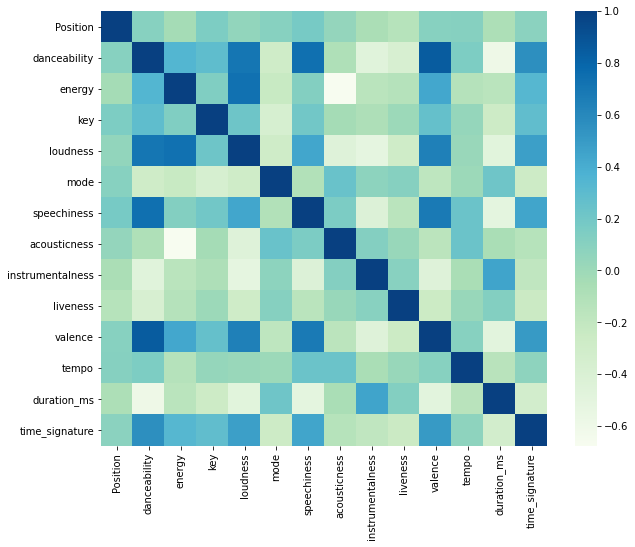

In [59]:
fig, ax = plt.subplots(figsize=(10,8))  
sns.heatmap(rw_spain_17_19.corr(), cmap='GnBu') ; 

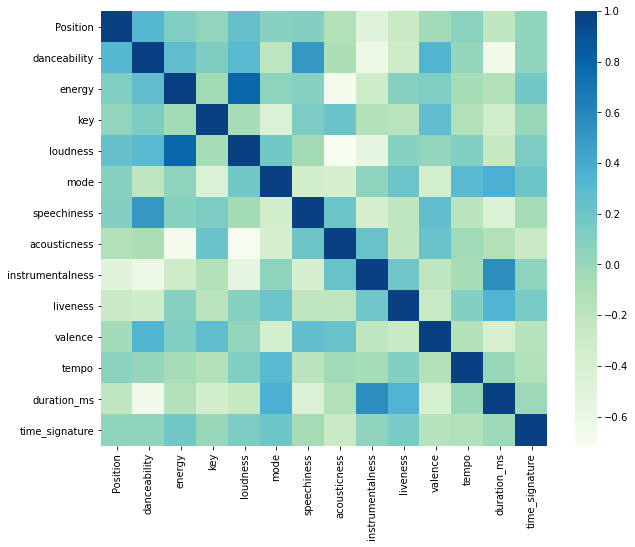

In [60]:
fig, ax = plt.subplots(figsize=(10,8))  
sns.heatmap(rw_greece_17_19.corr(), cmap='GnBu') ; 

### Plotting audio features using weekly data (`resample("W")`)

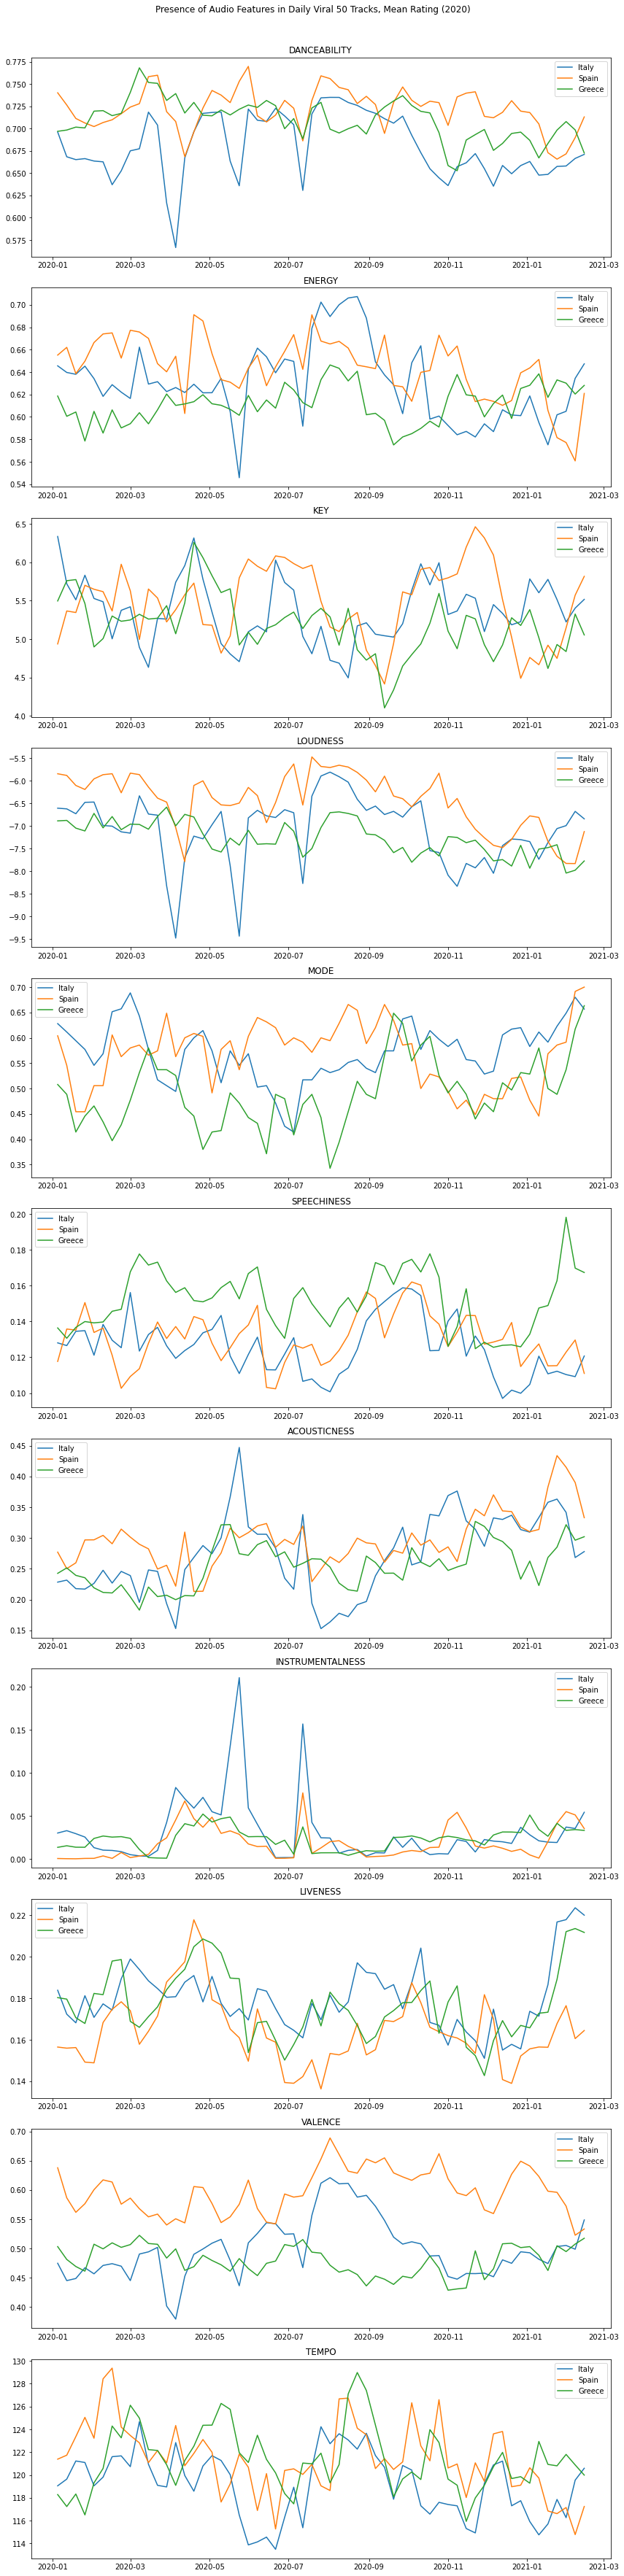

In [61]:
fig, axs = plt.subplots(nrows=11, ncols=1, figsize=(12,50))
fig.subplots_adjust(hspace=.5,wspace=0.4)

for i, feature in enumerate(audio_features): 

    axs[i].plot(rw_italy_20[feature], label='Italy')
    axs[i].plot(rw_spain_20[feature], label='Spain')
    axs[i].plot(rw_greece_20[feature], label='Greece')
    axs[i].set_title(f'{feature.upper()}')
    axs[i].legend()
    
fig.tight_layout()
fig.subplots_adjust(top=.96)
fig.suptitle('Presence of Audio Features in Daily Viral 50 Tracks, Mean Rating (2020)')
plt.show()

#### Combining weekly resampled data for all years (2017-2020)

In [62]:
alltime_rw_italy = pd.concat([rw_italy_17_19, rw_italy_20])
alltime_rw_spain = pd.concat([rw_spain_17_19, rw_spain_20])
alltime_rw_greece = pd.concat([rw_greece_17_19, rw_greece_20])

In [63]:
alltime_rw_spain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 217 entries, 2017-01-01 to 2021-02-14
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Position          217 non-null    float64
 1   danceability      217 non-null    float64
 2   energy            217 non-null    float64
 3   key               217 non-null    float64
 4   loudness          217 non-null    float64
 5   mode              217 non-null    float64
 6   speechiness       217 non-null    float64
 7   acousticness      217 non-null    float64
 8   instrumentalness  217 non-null    float64
 9   liveness          217 non-null    float64
 10  valence           217 non-null    float64
 11  tempo             217 non-null    float64
 12  duration_ms       217 non-null    float64
 13  time_signature    217 non-null    float64
dtypes: float64(14)
memory usage: 25.4 KB


### Plotting features 2017-2020, weekly resample (all dates)

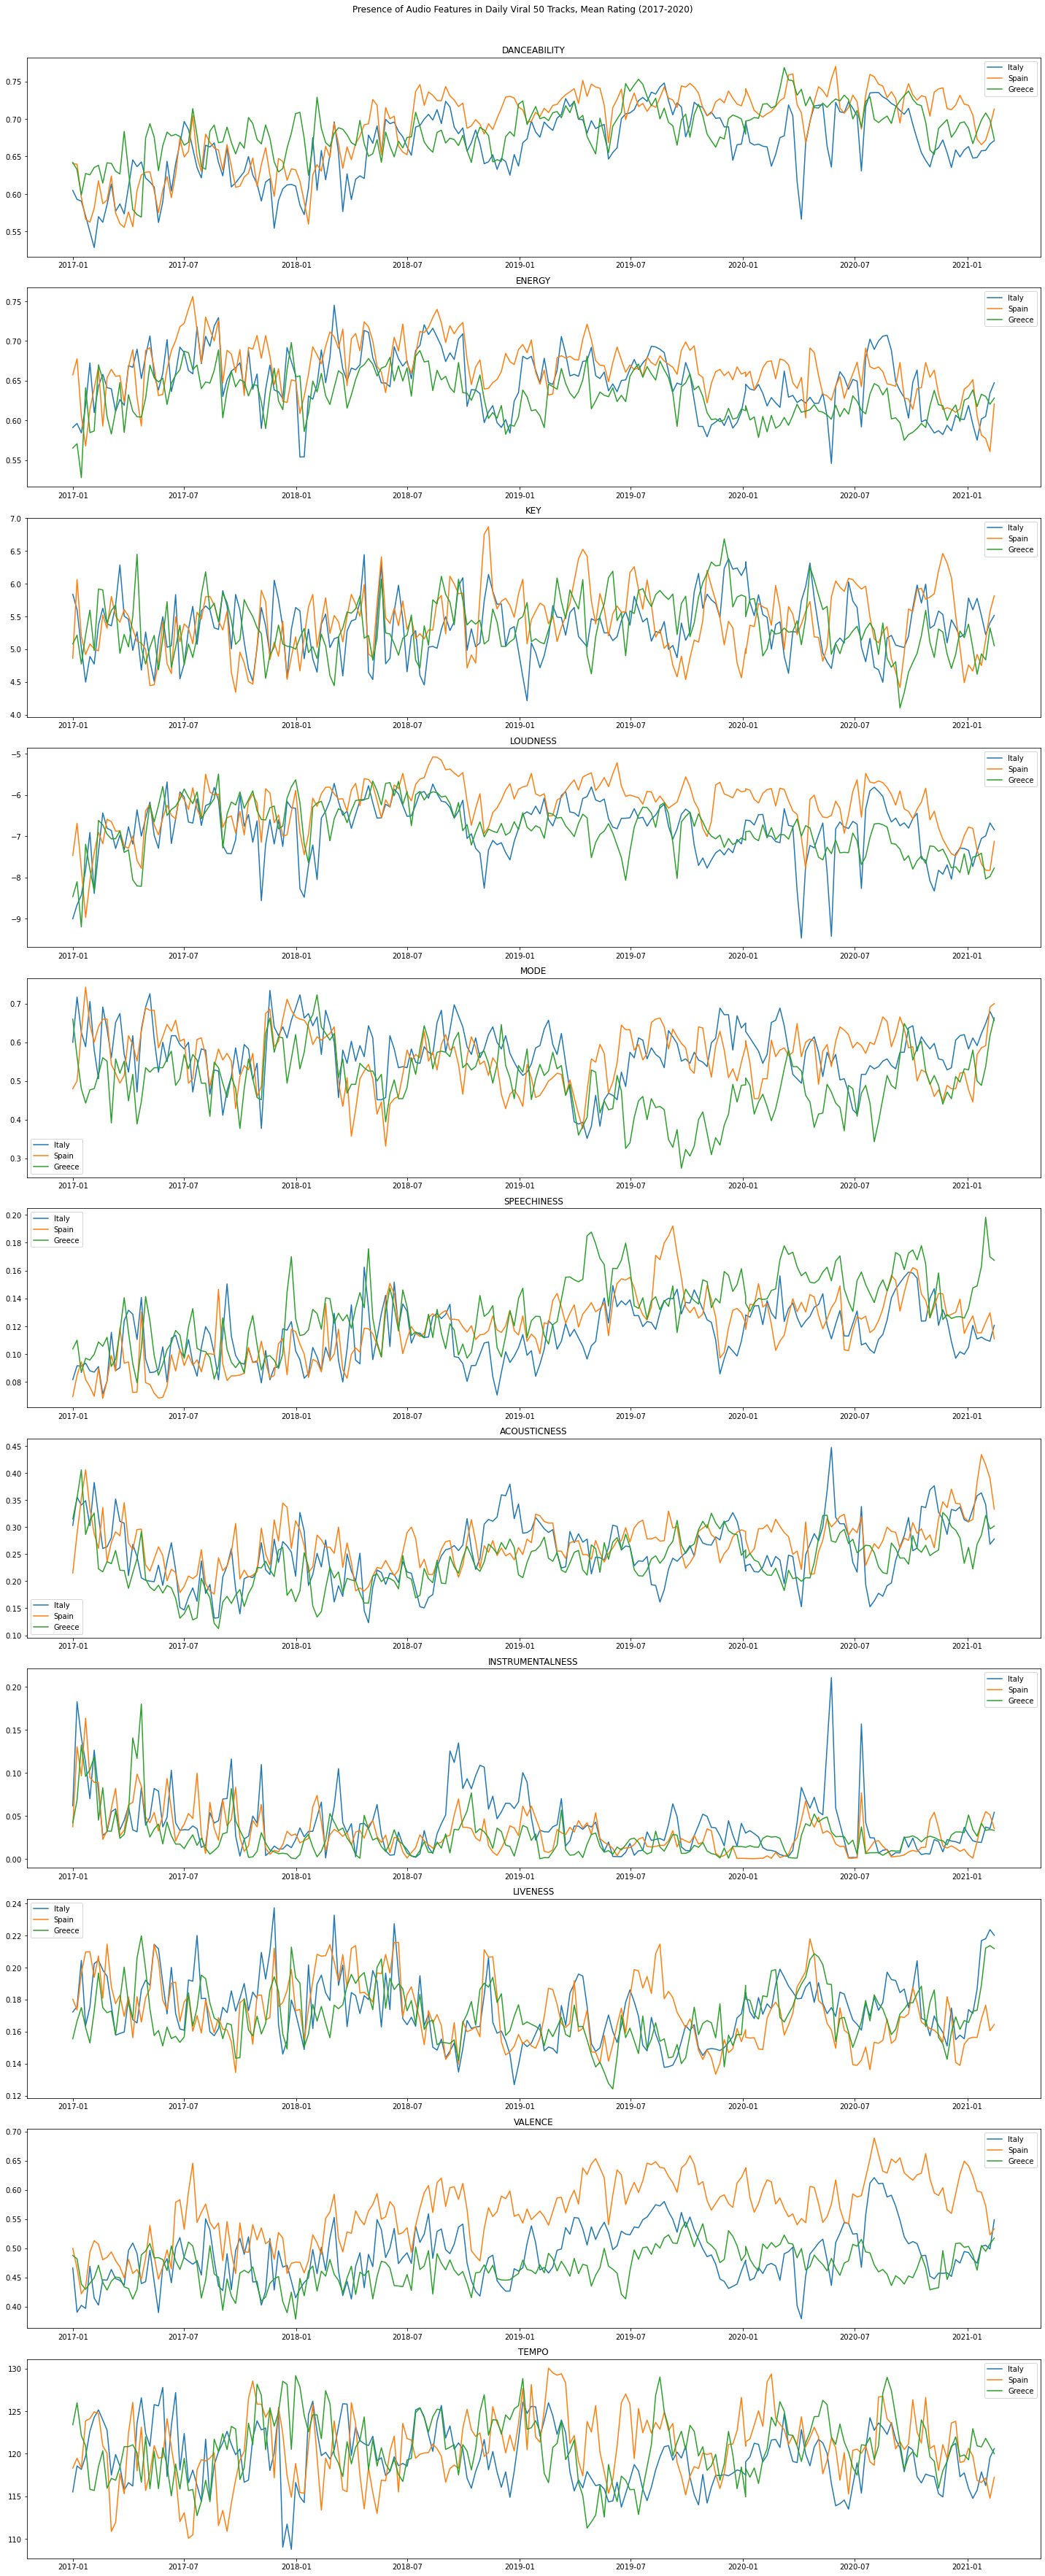

In [64]:
fig, axs = plt.subplots(nrows=11, ncols=1, figsize=(20,50))
fig.subplots_adjust(hspace=.5,wspace=0.4)

for i, feature in enumerate(audio_features): 

    axs[i].plot(alltime_rw_italy[feature], label='Italy')
    axs[i].plot(alltime_rw_spain[feature], label='Spain')
    axs[i].plot(alltime_rw_greece[feature], label='Greece')
    axs[i].set_title(f'{feature.upper()}')
    axs[i].legend()
    
fig.tight_layout()
fig.subplots_adjust(top=.96)
fig.suptitle('Presence of Audio Features in Daily Viral 50 Tracks, Mean Rating (2017-2020)')
plt.show()

#### Combining monthly resampled data for all years (2017-2020)

In [65]:
alltime_rm_italy = pd.concat([rm_italy_17_19, rm_italy_20])
alltime_rm_spain = pd.concat([rm_spain_17_19, rm_spain_20])
alltime_rm_greece = pd.concat([rm_greece_17_19, rm_greece_20])

In [66]:
alltime_rm_spain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50 entries, 2017-01-31 to 2021-02-28
Freq: M
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Position          50 non-null     float64
 1   danceability      50 non-null     float64
 2   energy            50 non-null     float64
 3   key               50 non-null     float64
 4   loudness          50 non-null     float64
 5   mode              50 non-null     float64
 6   speechiness       50 non-null     float64
 7   acousticness      50 non-null     float64
 8   instrumentalness  50 non-null     float64
 9   liveness          50 non-null     float64
 10  valence           50 non-null     float64
 11  tempo             50 non-null     float64
 12  duration_ms       50 non-null     float64
 13  time_signature    50 non-null     float64
dtypes: float64(14)
memory usage: 5.9 KB


### Plotting features 2017-2020, weekly resample (all dates)

In [ ]:
# Code modified from code written by Matthew Garton.

def my_plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(15,3))
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=20)
    plt.xlabel(xlab, fontsize=12)
    plt.ylabel(ylab, fontsize=12)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=14)
    plt.xticks(df.index[0::steps], fontsize=18) ;

In [87]:
audio_features

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

In [88]:
five_features = ['danceability', 'energy', 'mode', 'acousticness', 'valence']

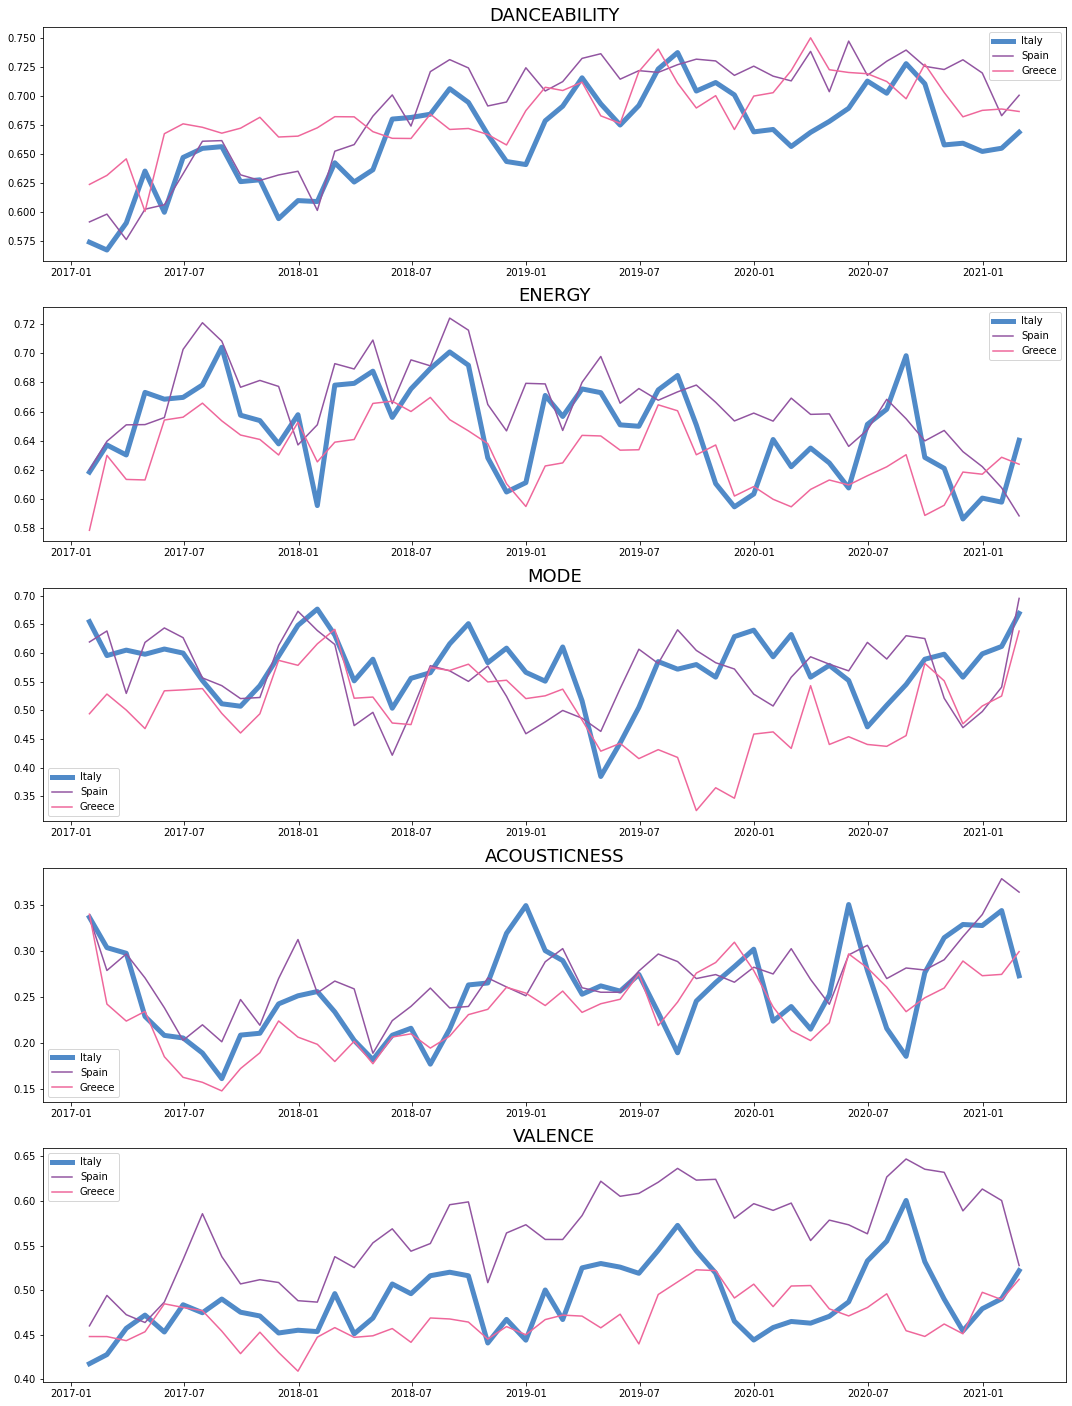

In [115]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(15,20))
fig.subplots_adjust(hspace=.5,wspace=0.4)

for i, feature in enumerate(five_features): 

    axs[i].plot(alltime_rm_italy[feature], label='Italy', color='#508ac8', lw=5)
    axs[i].plot(alltime_rm_spain[feature], label='Spain', color='#9255a1')
    axs[i].plot(alltime_rm_greece[feature], label='Greece', color='#ef679b')
    axs[i].set_title(f'{feature.upper()}', fontsize=18)
    axs[i].legend()
    
fig.tight_layout()
fig.subplots_adjust(top=.96)
# fig.suptitle('Presence of Audio Features in Daily Viral 50 Tracks, Mean Rating (2017-2020)')
# plt.xticks(alltime_rm_italy.index[0::1], fontsize=18)
plt.show()

fig.savefig('five_feature_EDA')

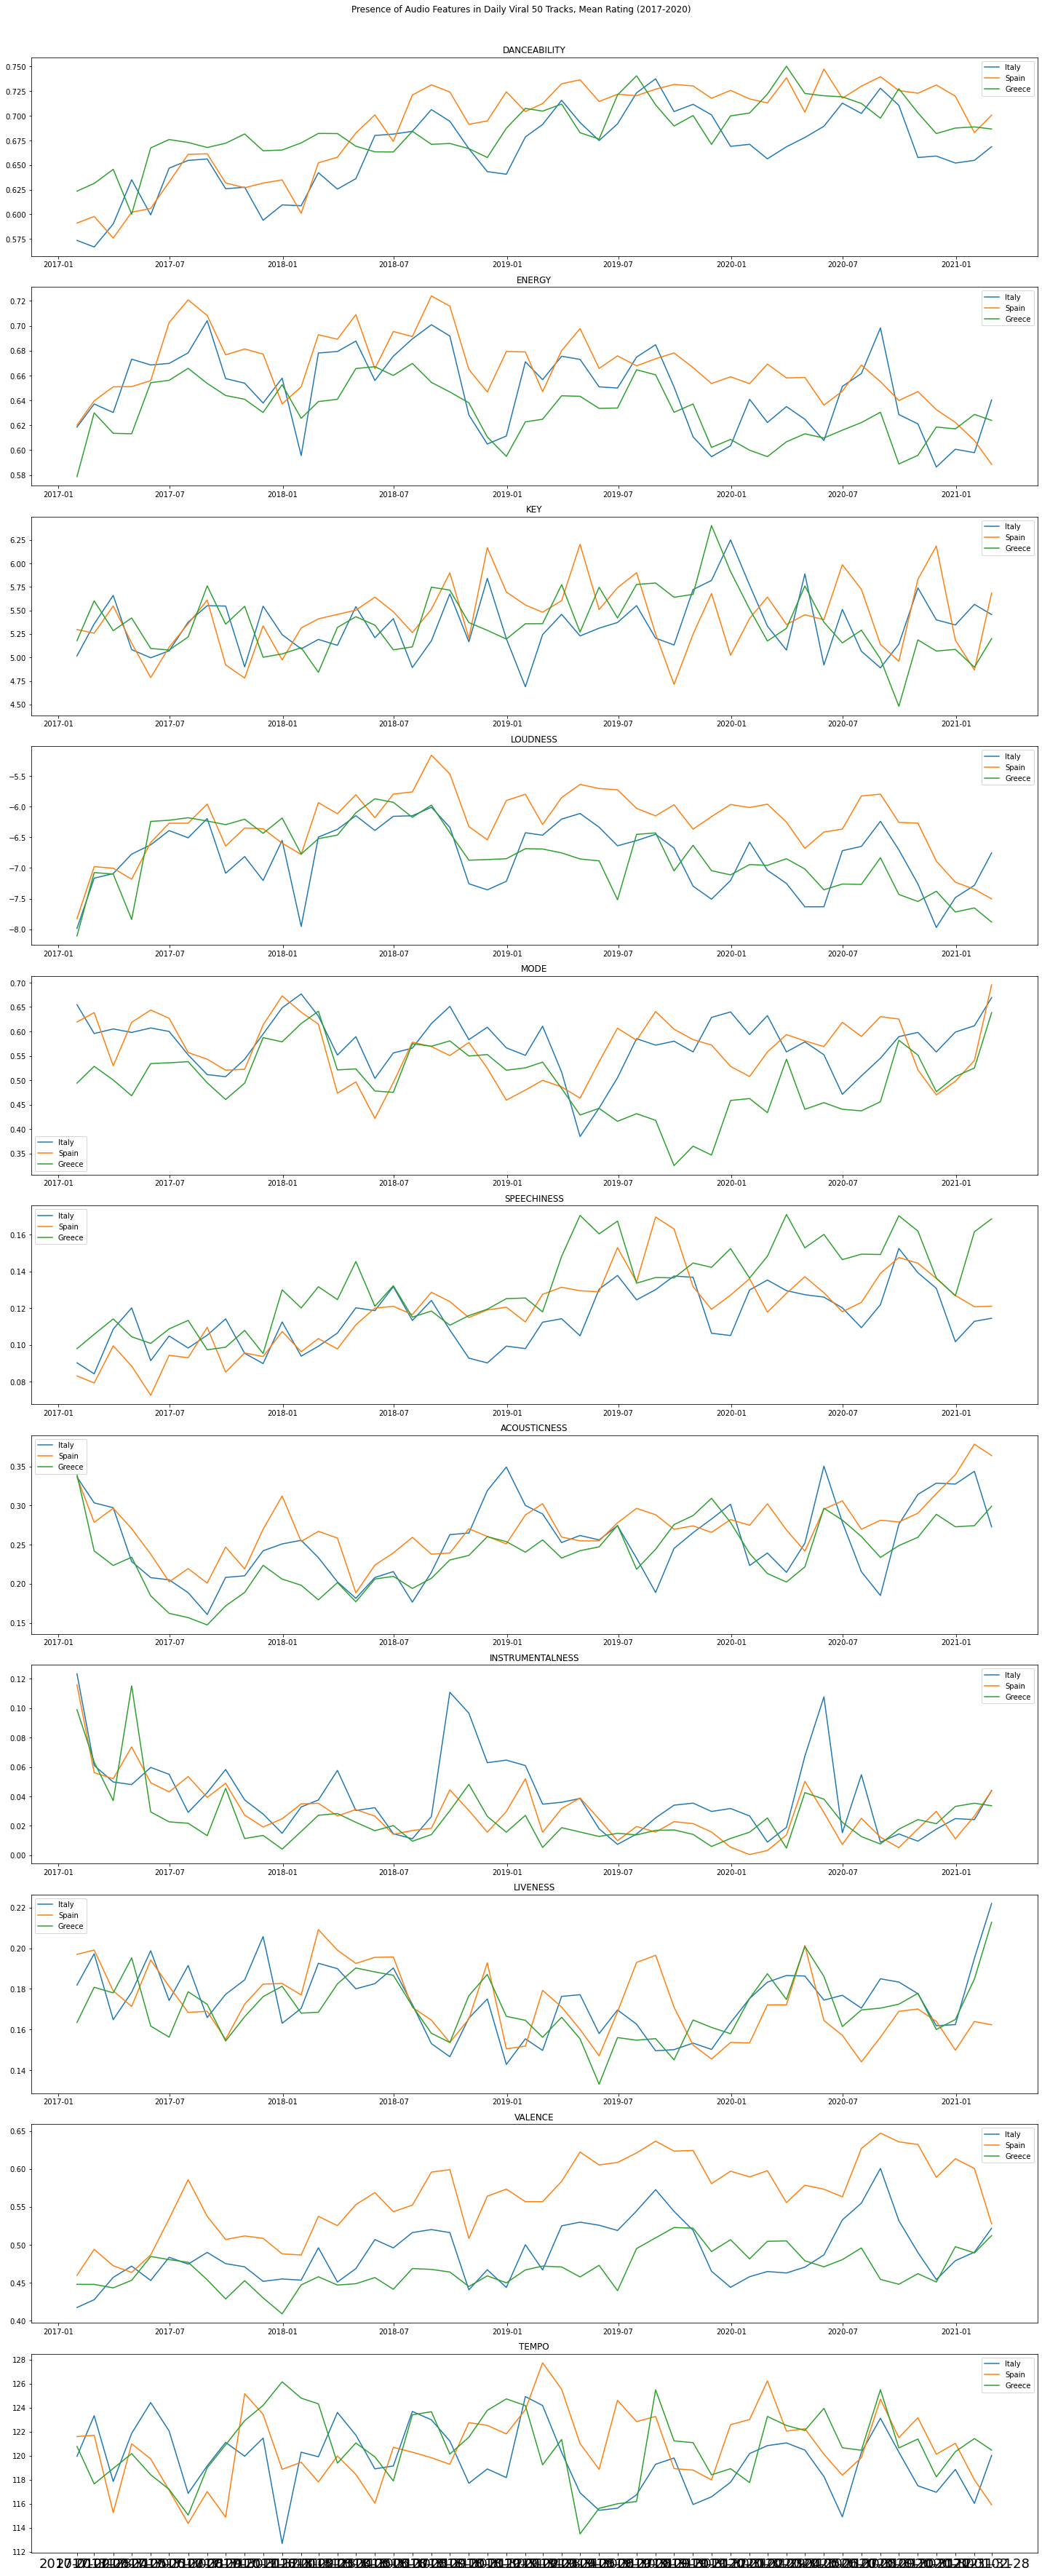

In [86]:
fig, axs = plt.subplots(nrows=11, ncols=1, figsize=(20,50))
fig.subplots_adjust(hspace=.5,wspace=0.4)

for i, feature in enumerate(audio_features): 

    axs[i].plot(alltime_rm_italy[feature], label='Italy')
    axs[i].plot(alltime_rm_spain[feature], label='Spain')
    axs[i].plot(alltime_rm_greece[feature], label='Greece')
    axs[i].set_title(f'{feature.upper()}')
    axs[i].legend()
    
fig.tight_layout()
fig.subplots_adjust(top=.96)
fig.suptitle('Presence of Audio Features in Daily Viral 50 Tracks, Mean Rating (2017-2020)')
plt.xticks(alltime_rm_italy.index[0::1], fontsize=18)
plt.show()

### Plotting series for differenced data

In [68]:
# Code modified from code written by Matthew Garton.

def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18) ;

In [69]:
lag_df = alltime_rw_italy.copy()
lag_df.head()

Position  danceability    energy       key  loudness      mode  \
date                                                                         
2017-01-01      25.5      0.604800  0.591096  5.840000 -9.008200  0.600000   
2017-01-08      25.5      0.592829  0.596115  5.602857 -8.670323  0.717143   
2017-01-15      25.5      0.590561  0.584263  5.025714 -8.433451  0.625714   
2017-01-22      25.5      0.570760  0.618591  4.497143 -7.809969  0.588571   
2017-01-29      25.5      0.549560  0.672368  4.888571 -6.910569  0.705714   

            speechiness  acousticness  instrumentalness  liveness   valence  \
date                                                                          
2017-01-01     0.081670      0.303003          0.061578  0.172262  0.466054   
2017-01-08     0.091595      0.355359          0.182476  0.175617  0.390494   
2017-01-15     0.091436      0.340648          0.141121  0.204428  0.402156   
2017-01-22     0.093505      0.348782          0.111421  0.163771  0.396994   
2017-01-29     0.087994      0.302466          0.069887  0.175481  0.469083   

                 tempo    duration_ms  time_signature  
date                                                   
2017-01-01  115.511720  257468.600000        3.860000  
2017-01-08  118.564109  279987.502857        3.908571  
2017-01-15  118.157554  252121.394286        3.985714  
2017-01-22  119.730454  240012.791429        3.934286  
2017-01-29  122.640960  230365.305714        3.954286

In [70]:
for feature in audio_features: 
    lag_df[f'{feature}_once_differenced'] = lag_df[feature].diff(1).fillna(0)

In [71]:
lag_df.head()

Position  danceability    energy       key  loudness      mode  \
date                                                                         
2017-01-01      25.5      0.604800  0.591096  5.840000 -9.008200  0.600000   
2017-01-08      25.5      0.592829  0.596115  5.602857 -8.670323  0.717143   
2017-01-15      25.5      0.590561  0.584263  5.025714 -8.433451  0.625714   
2017-01-22      25.5      0.570760  0.618591  4.497143 -7.809969  0.588571   
2017-01-29      25.5      0.549560  0.672368  4.888571 -6.910569  0.705714   

            speechiness  acousticness  instrumentalness  liveness  ...  \
date                                                               ...   
2017-01-01     0.081670      0.303003          0.061578  0.172262  ...   
2017-01-08     0.091595      0.355359          0.182476  0.175617  ...   
2017-01-15     0.091436      0.340648          0.141121  0.204428  ...   
2017-01-22     0.093505      0.348782          0.111421  0.163771  ...   
2017-01-29     0.087994      0.302466          0.069887  0.175481  ...   

            energy_once_differenced  key_once_differenced  \
date                                                        
2017-01-01                 0.000000              0.000000   
2017-01-08                 0.005019             -0.237143   
2017-01-15                -0.011853             -0.577143   
2017-01-22                 0.034328             -0.528571   
2017-01-29                 0.053777              0.391429   

            loudness_once_differenced  mode_once_differenced  \
date                                                           
2017-01-01                   0.000000               0.000000   
2017-01-08                   0.337877               0.117143   
2017-01-15                   0.236871              -0.091429   
2017-01-22                   0.623483              -0.037143   
2017-01-29                   0.899400               0.117143   

            speechiness_once_differenced  acousticness_once_differenced  \
date                                                                      
2017-01-01                      0.000000                       0.000000   
2017-01-08                      0.009925                       0.052356   
2017-01-15                     -0.000159                      -0.014711   
2017-01-22                      0.002069                       0.008134   
2017-01-29                     -0.005511                      -0.046316   

            instrumentalness_once_differenced  liveness_once_differenced  \
date                                                                       
2017-01-01                           0.000000                   0.000000   
2017-01-08                           0.120898                   0.003355   
2017-01-15                          -0.041355                   0.028811   
2017-01-22                          -0.029699                  -0.040657   
2017-01-29                          -0.041534                   0.011710   

            valence_once_differenced  tempo_once_differenced  
date                                                          
2017-01-01                  0.000000                0.000000  
2017-01-08                 -0.075560                3.052389  
2017-01-15                  0.011662               -0.406554  
2017-01-22                 -0.005162                1.572900  
2017-01-29                  0.072090                2.910506  

[5 rows x 25 columns]

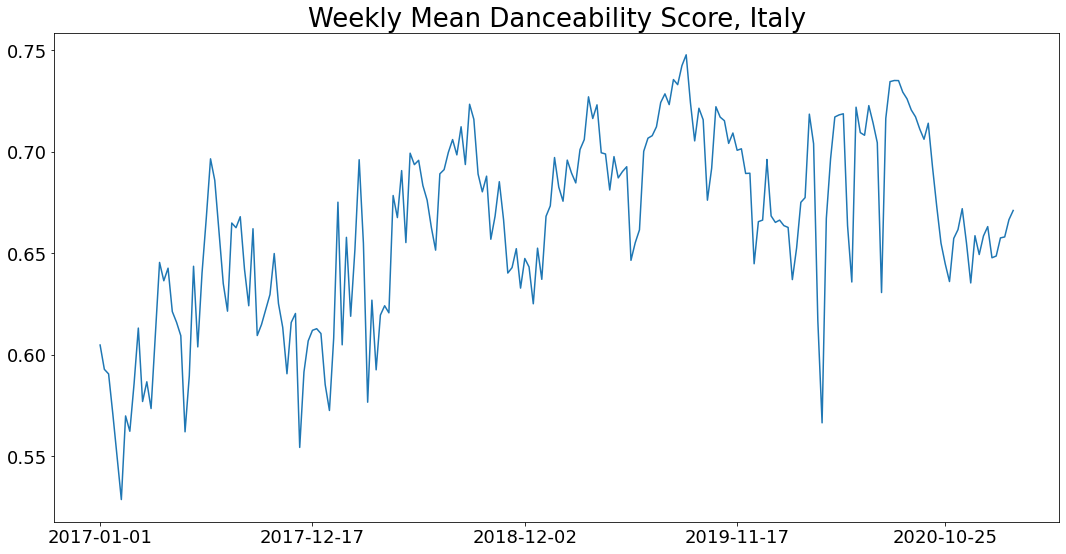

In [72]:
plot_series(lag_df, ['danceability'], title='Weekly Mean Danceability Score, Italy', steps=50)

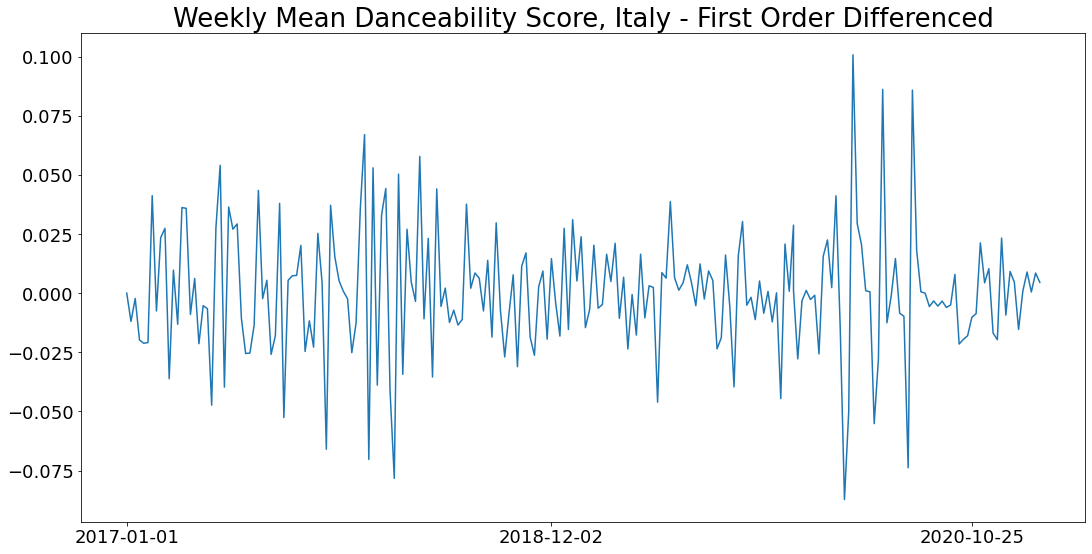

In [73]:
plot_series(lag_df, ['danceability_once_differenced'], title='Weekly Mean Danceability Score, Italy - First Order Differenced', steps=100)

In [74]:
# Code modified from code written by Matthew Garton.

def my_plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(15,3))
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=20)
    plt.xlabel(xlab, fontsize=12)
    plt.ylabel(ylab, fontsize=12)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=14)
    plt.xticks(df.index[0::steps], fontsize=18) ;

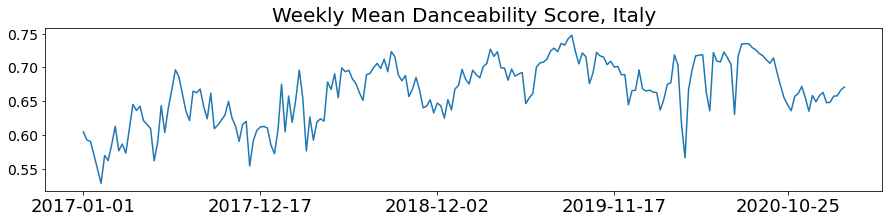

In [75]:
my_plot_series(lag_df, ['danceability'], title='Weekly Mean Danceability Score, Italy', steps=50)

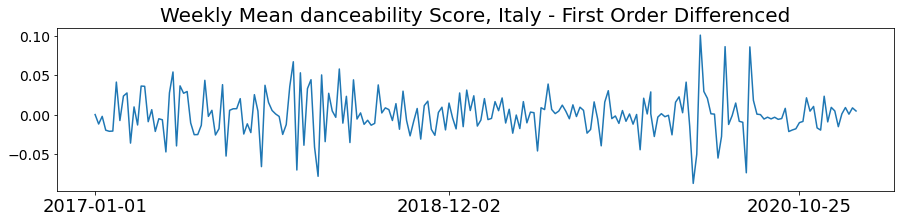

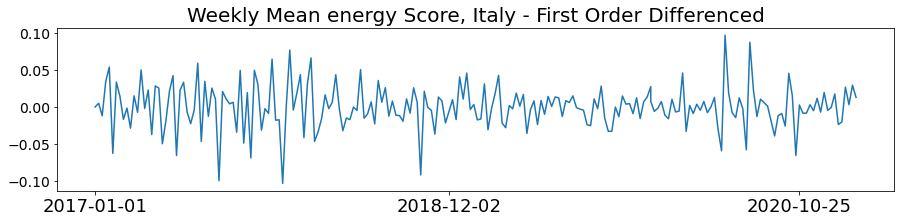

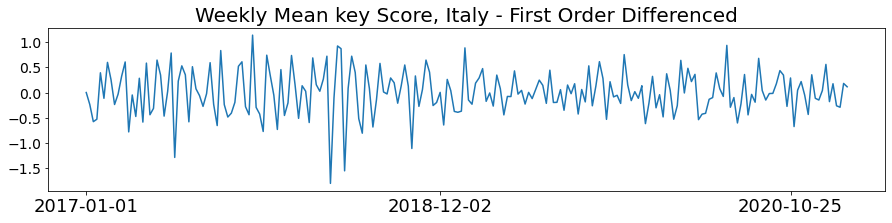

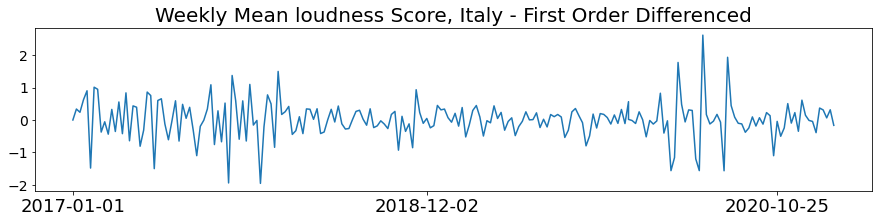

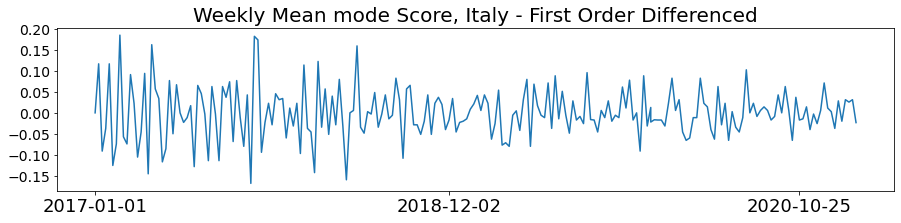

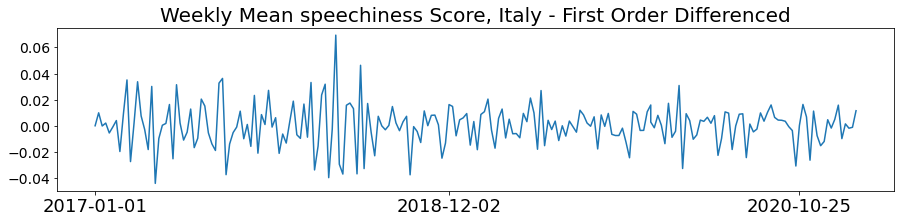

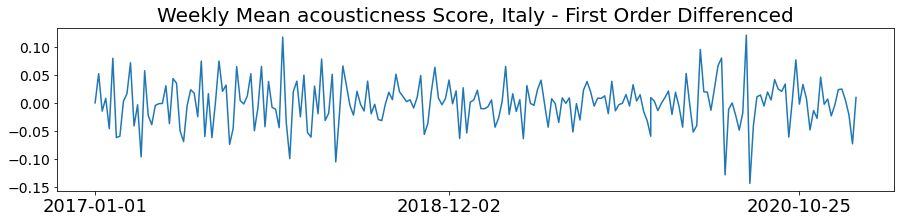

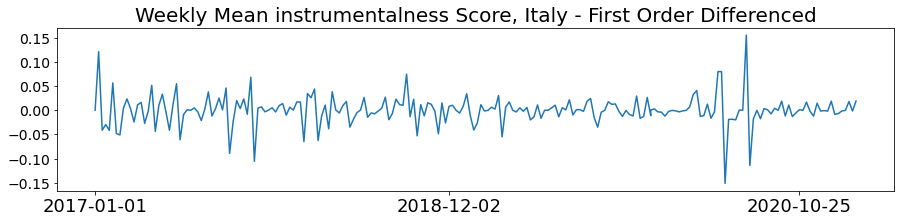

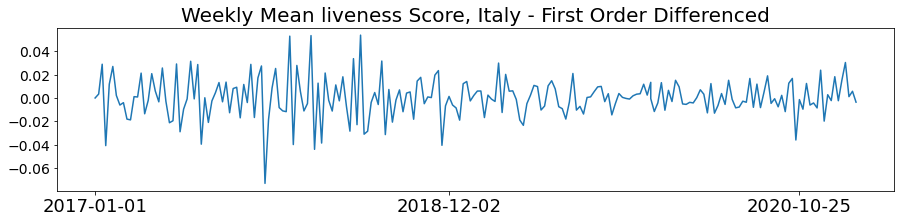

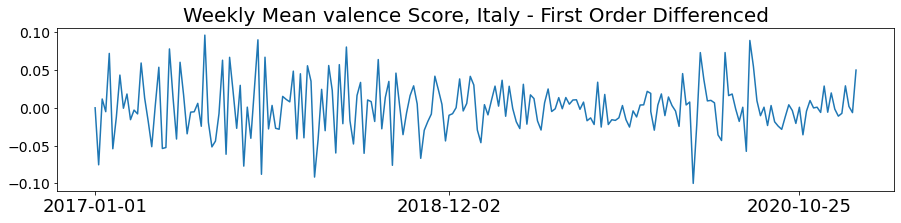

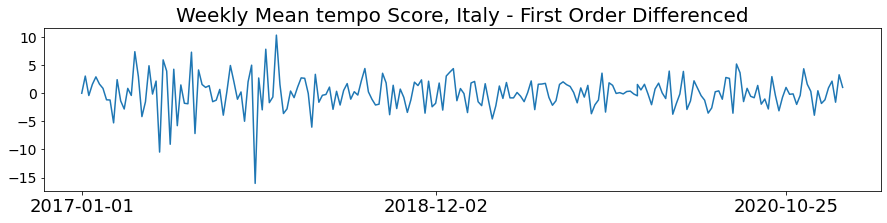

In [76]:
for i, feature in enumerate(audio_features): 
    
    my_plot_series(lag_df, [f'{feature}_once_differenced'], title=f'Weekly Mean {feature} Score, Italy - First Order Differenced', steps=100)

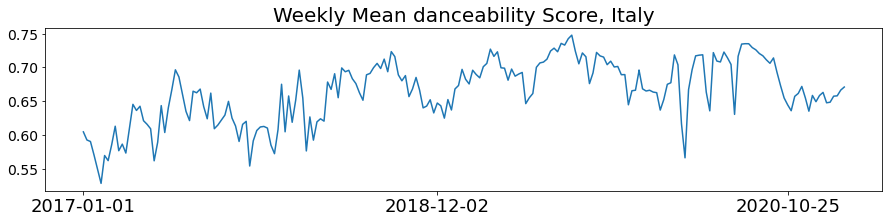

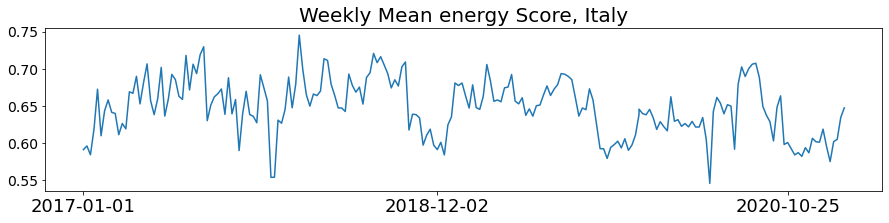

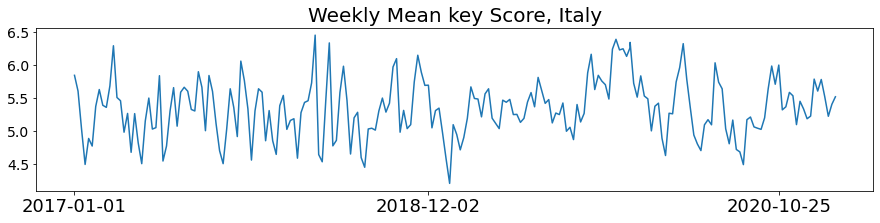

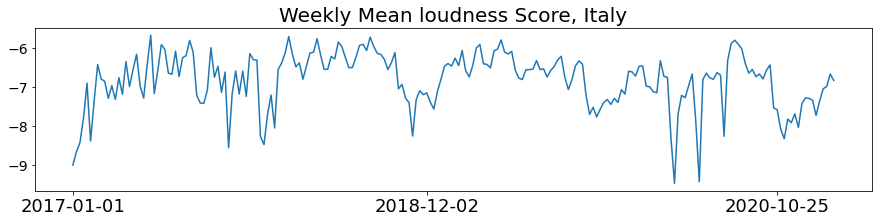

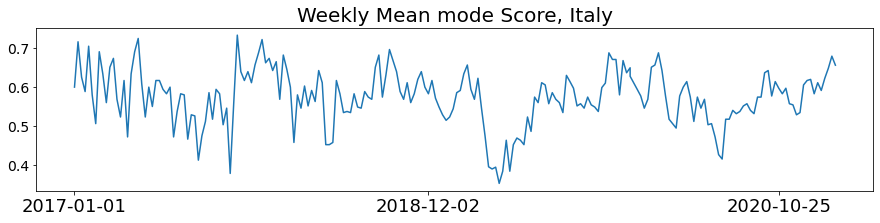

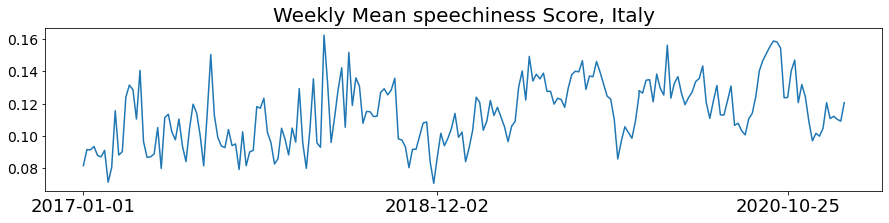

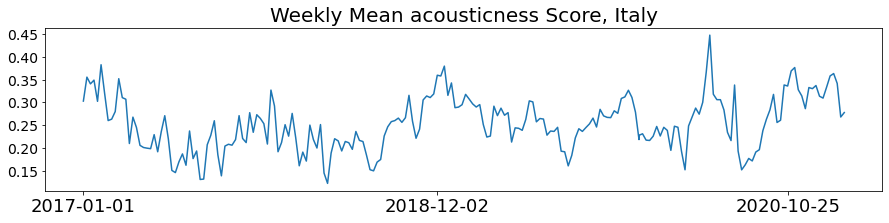

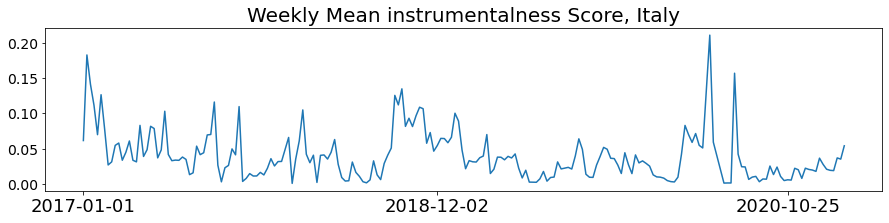

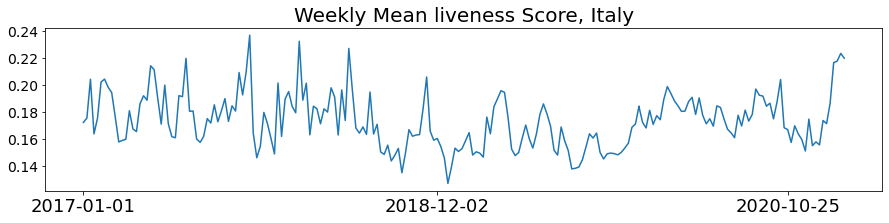

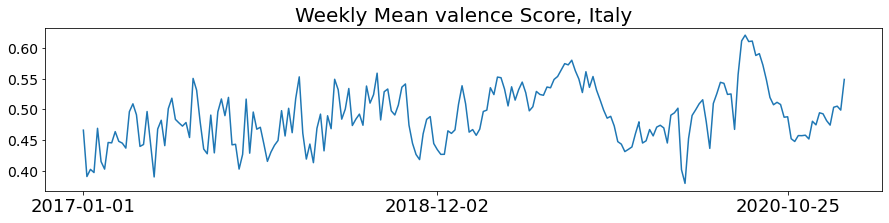

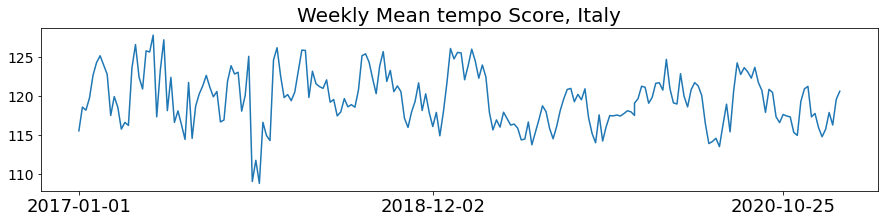

In [77]:
for i, feature in enumerate(audio_features): 
    
    my_plot_series(lag_df, [feature], title=f'Weekly Mean {feature} Score, Italy', steps=100)

#### _For most features, once-differenced data looks for more stationary, though the un-differenced data looks okay._

In [79]:
from statsmodels.tsa.seasonal import seasonal_decompose

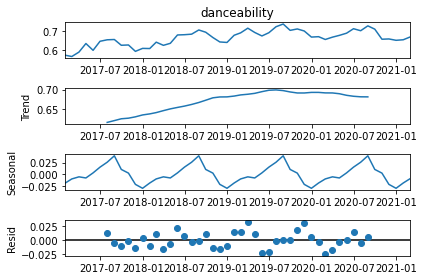

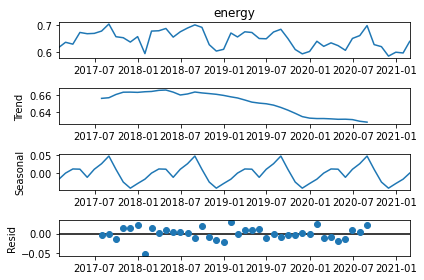

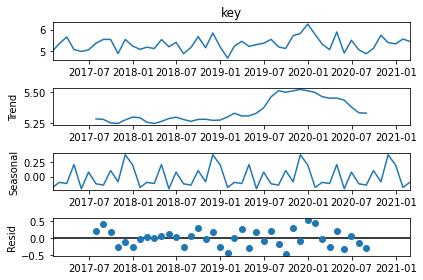

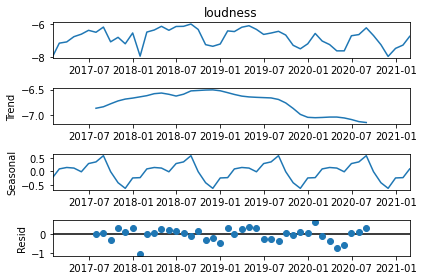

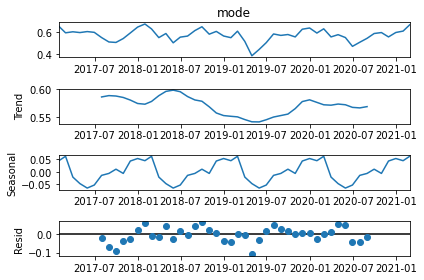

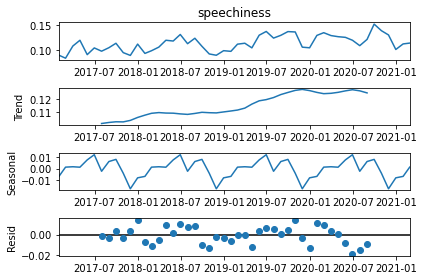

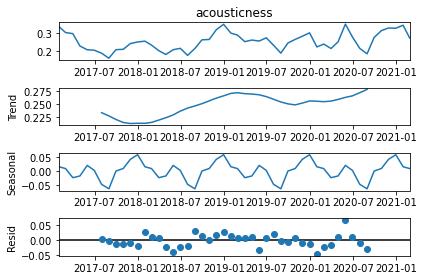

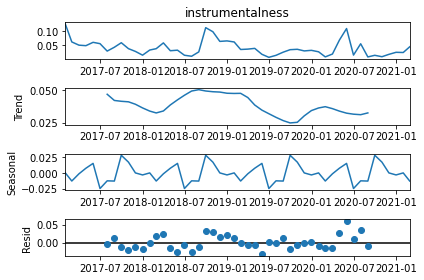

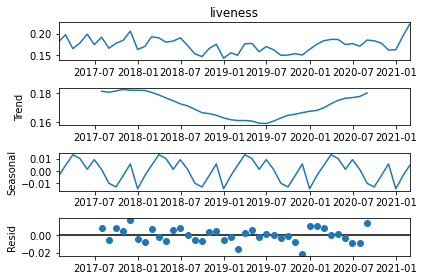

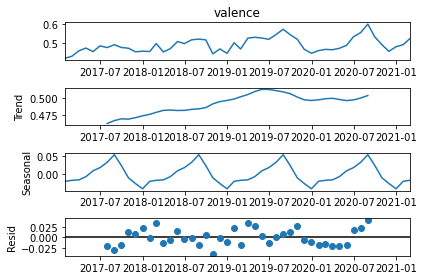

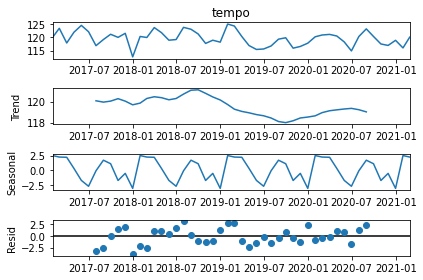

In [82]:
for feature in audio_features: 
    
    # Decompose time series into trend, seasonal, and residual components.
    decomp = seasonal_decompose(alltime_rm_italy[feature])

    # Plot the decomposed time series.
    decomp.plot();